## functions

In [19]:
def plot_scaled_area_summary(df, scale_factor=10000, label="Area (×10⁴ units)"):
    """
    Creates a histogram and prints summary stats for the Area column,
    scaled temporarily by a factor (default = 10,000).
    """
    import matplotlib.pyplot as plt

    if "Area" not in df.columns:
        raise ValueError("The DataFrame must contain an 'Area' column.")

    # Temporarily scale the data
    scaled_area = df["Area"] * scale_factor
    stats = scaled_area.describe()

    # Plot histogram
    plt.figure(figsize=(8, 5))
    plt.hist(scaled_area, bins='auto', edgecolor='black')
    plt.axvline(stats['mean'], color='red', linestyle='dashed', linewidth=1, label=f"Mean = {stats['mean']:.2f}")
    plt.axvline(stats['50%'], color='green', linestyle='dotted', linewidth=1, label=f"Median = {stats['50%']:.2f}")
    plt.title(f"Area in [um]")
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print summary stats
    print(f"\n📊 Summary statistics for scaled Area [in um](×{scale_factor}):")
    print(stats[["count", "mean", "std", "min", "25%", "50%", "75%", "max"]].round(2))


In [1]:
from scipy.stats import gaussian_kde

def create_three_graphs(dfA, dfB, dfC, dfD, column_name, save_dir=None):
    colors = ["steelblue", "seagreen", "orchid", 'red']
    pdList = [dfA, dfB, dfC, dfD]
    titles = ["A", "B", "C", "D"]
    
    # Compute global x range
    global_df = pd.concat(pdList)
    filtered_df = global_df[global_df[column_name].notna()]
    
    if filtered_df.empty:
        print(f"❌ No data found for column '{column_name}'.")
        return
    
    all_column = filtered_df[column_name]
    x_min, x_max = all_column.min(), all_column.max()

       # Compute y_max using actual histogram heights (density=True)
    y_max = 0
    for df in pdList:
        subset = df[column_name].dropna()
        if len(subset) > 1:
            counts, _ = np.histogram(subset, bins=20, density=True)
            y_max = max(y_max, counts.max())

    # Add margin
    y_limit = y_max * 1.1 if y_max > 0 else 0.1


    # Create subplots
    fig, axes = plt.subplots(1, 4, figsize=(20, 9), sharex=True, sharey=True)

    for ax, df, color, title in zip(axes, pdList, colors, titles):
        subset = df[column_name].dropna()
        if len(subset) == 0:
            ax.set_visible(False)
            continue

        ax.hist(
            subset,
            bins=20,
            color=color,
            edgecolor="black",
            density=True
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(0, y_limit)
        ax.set_title(f"{title}: {column_name}", fontsize=17)
        ax.set_xlabel(column_name)

    axes[0].set_ylabel("Proportion")
    plt.tight_layout()

    if save_dir:
        plt.savefig(f"{save_dir}/{column_name}_comparison.png", dpi=300)
        print(f"✅ Saved to {save_dir}/{column_name}_comparison.png")

    plt.show()


def generate_summary(dfA, dfB, dfC, dfD, column_name):
    pdList = [dfA, dfB, dfC, dfD]
    titles = ["A", "B", "C", "D"]

    for title, df in zip(titles, pdList):
        print(f"\n{title}: {column_name}")
        if column_name in df.columns:
            summary = df[column_name].describe().round(2)
            print(summary.to_frame(name=column_name))
        else:
            print(f"⚠️ Column '{column_name}' not found in DataFrame {title}.")


def generate_all_summaries(dfA, dfB, dfC, dfD):
    pdList = [dfA, dfB, dfC, dfD]
    titles = ["A", "B", "C", "D"]

    # Find common numeric columns
    common_cols = set(dfA.columns)
    for df in pdList[1:]:
        common_cols &= set(df.columns)
    numeric_cols = [col for col in common_cols if pd.api.types.is_numeric_dtype(dfA[col])]

    print("📊 Summary statistics for all common numeric columns:\n")

    for col in sorted(numeric_cols):
        print(f"\n🔹 {col}:\n")
        summary_df = pd.DataFrame()

        for title, df in zip(titles, pdList):
            if col in df.columns:
                summary = df[col].describe().round(2)
                summary_df[title] = summary

        display(summary_df.T)  # Use IPython display if in notebook; or use print below if not
        # print(summary_df.T.to_string())  # Uncomment if running in plain script

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def generate_all_histograms(dfA, dfB, dfC, dfD, save_dir=None):
    pdList = [dfA, dfB, dfC, dfD]
    titles = ["A", "B", "C", "D"]
    colors = ["steelblue", "seagreen", "orchid", "red"]

    # Find common numeric columns
    common_cols = set(dfA.columns)
    for df in pdList[1:]:
        common_cols &= set(df.columns)
    numeric_cols = [col for col in common_cols if pd.api.types.is_numeric_dtype(dfA[col])]

    print("📊 Generating histograms for all common numeric columns:\n")

    for col in sorted(numeric_cols):
        print(f"📈 Plotting: {col}")

        # Combine to get x-axis range
        global_df = pd.concat(pdList)
        filtered = global_df[col].dropna()
        if filtered.empty:
            print(f"⚠️ Skipping {col} (no data)")
            continue
        x_min, x_max = filtered.min(), filtered.max()

        # Compute dynamic y_max (proportion-based)
        y_max = 0
        for df in pdList:
            values = df[col].dropna()
            if len(values) > 1:
                counts, _ = np.histogram(values, bins=20, density=True)
                y_max = max(y_max, counts.max())
        y_limit = y_max * 1.1 if y_max > 0 else 0.1

        # Create 1x4 subplot
        fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

        for ax, df, title, color in zip(axes, pdList, titles, colors):
            subset = df[col].dropna()
            if len(subset) == 0:
                ax.set_visible(False)
                continue

            ax.hist(
                subset,
                bins=20,
                density=True,
                color=color,
                edgecolor="black",
                alpha=0.8
            )
            ax.set_title(f"{title}", fontsize=15)
            ax.set_xlabel(col)
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(0, y_limit)

        axes[0].set_ylabel("Proportion")
        plt.suptitle(f"{col} Comparison", fontsize=18)
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        if save_dir:
            filename = f"{save_dir}/{col}_histogram.png"
            plt.savefig(filename, dpi=300)
            print(f"✅ Saved: {filename}")

        plt.show()


In [2]:
dfA = pd.read_csv(r"C:\Users\priya\Downloads\dfA724.csv")
dfB = pd.read_csv(r"C:\Users\priya\Downloads\dfB724.csv")
dfC = pd.read_csv(r"C:\Users\priya\Downloads\dfC724.csv")
dfD = pd.read_csv(r"C:\Users\priya\Downloads\dfD724.csv")

## Graphs

📊 Generating histograms for all common numeric columns:

📈 Plotting: Area


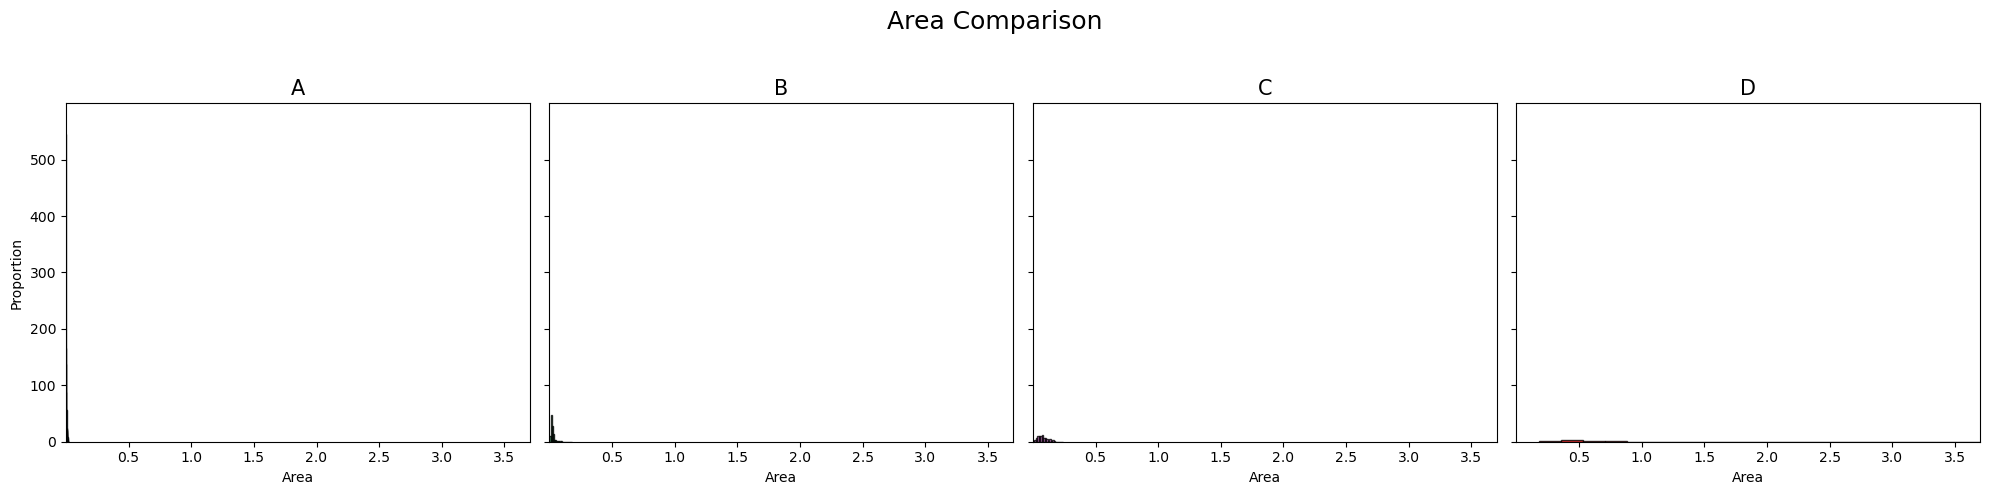

📈 Plotting: AverageThickness


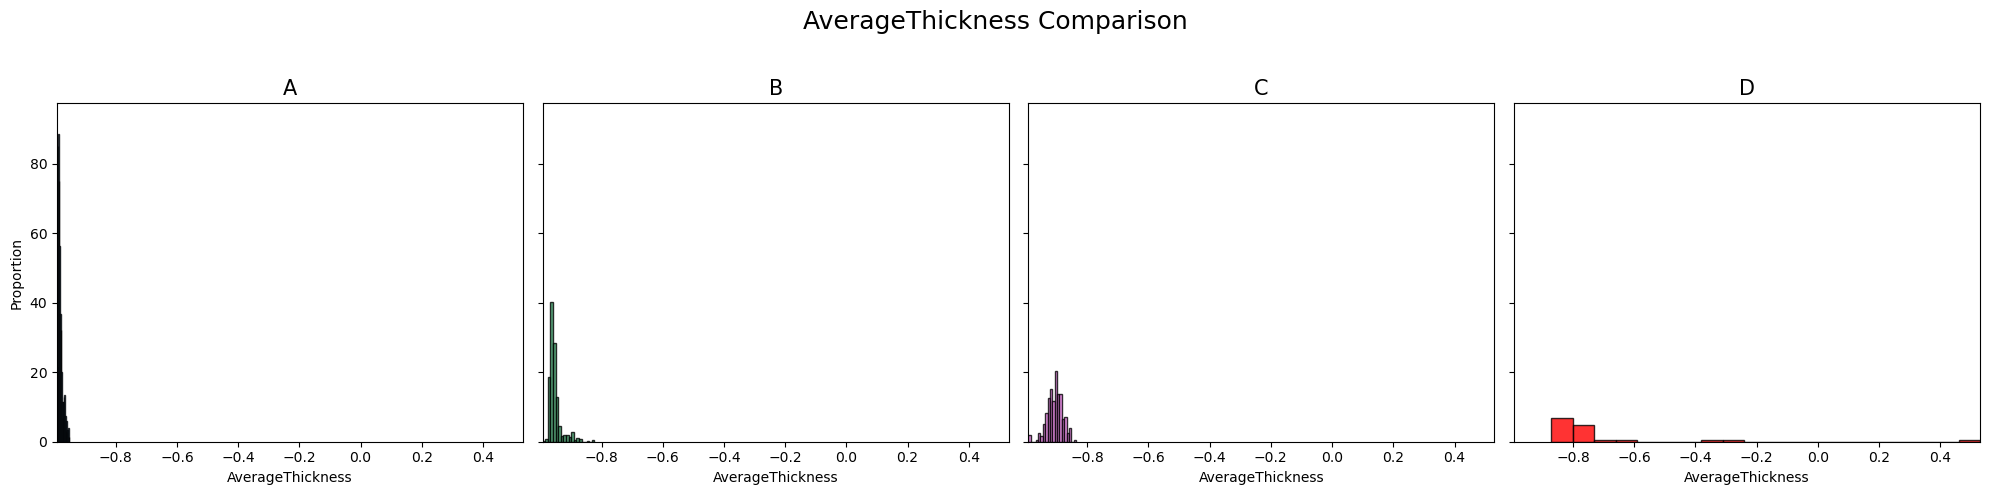

📈 Plotting: Box.X.Max


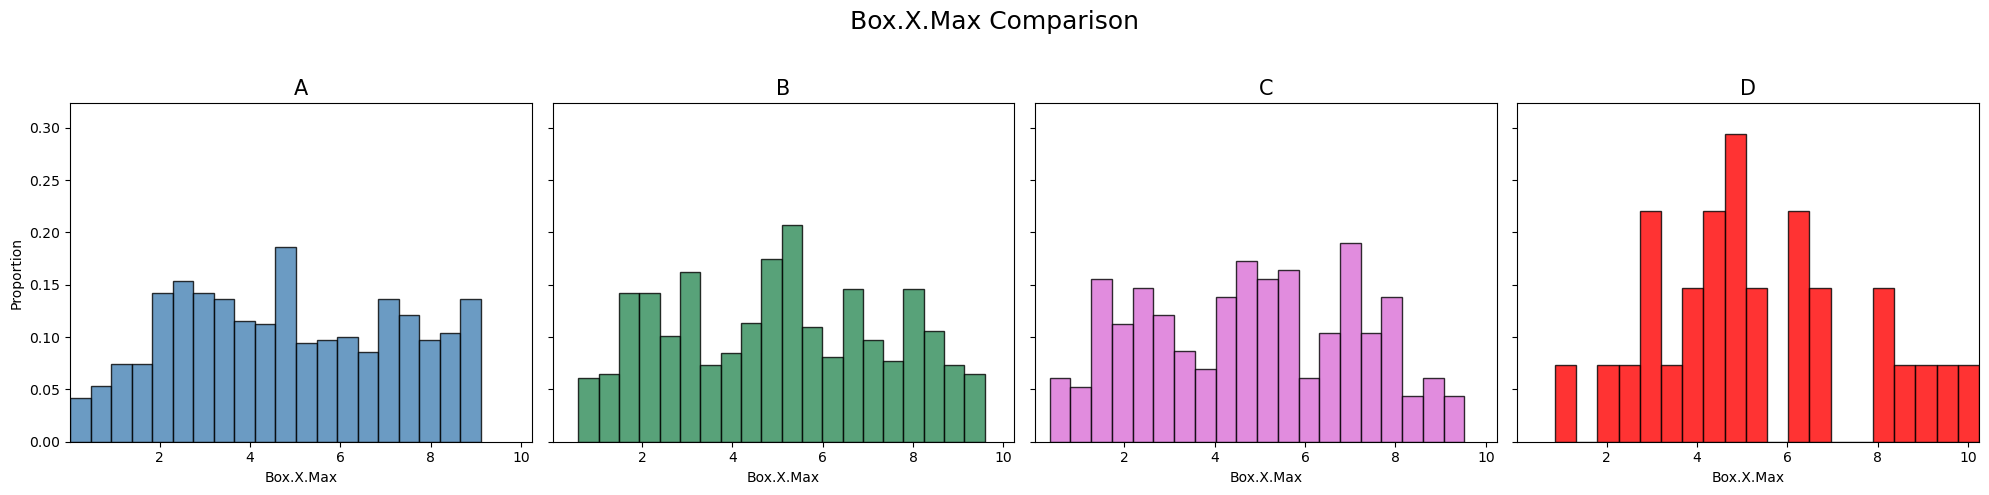

📈 Plotting: Box.X.Min


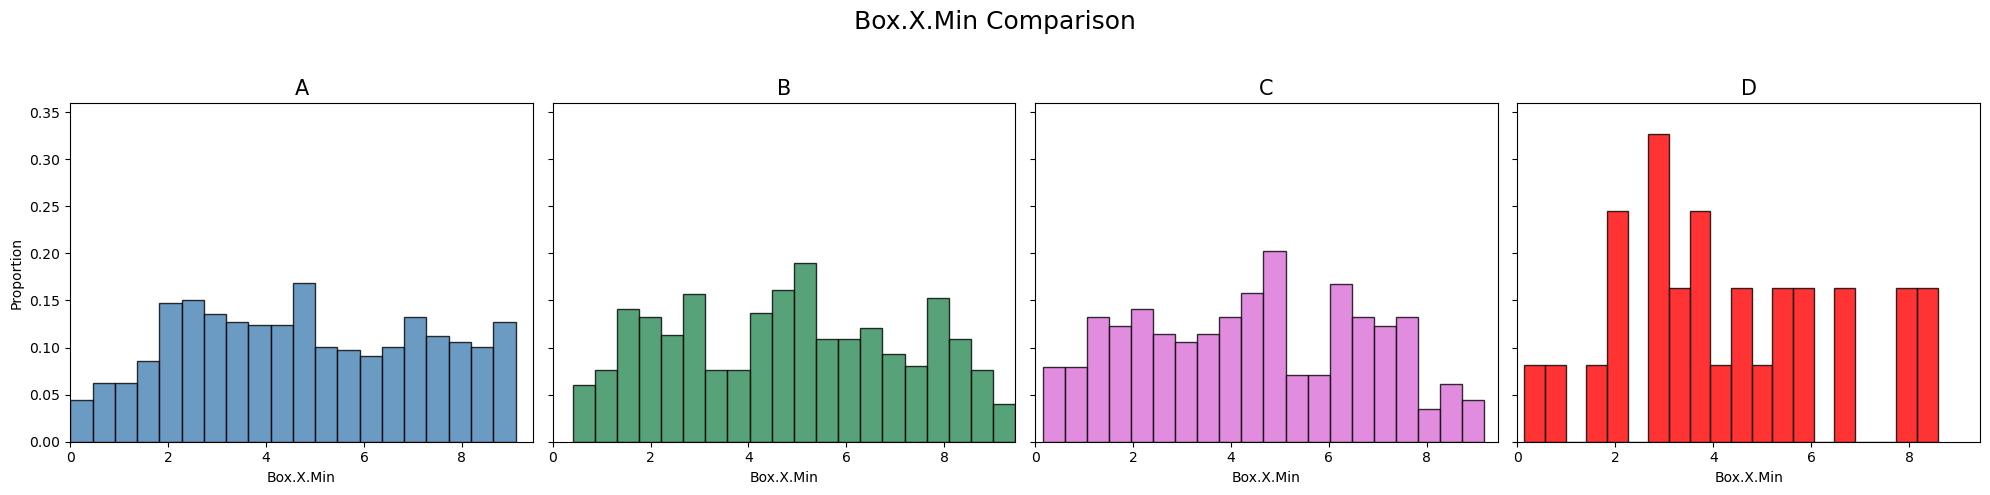

📈 Plotting: Box.Y.Max


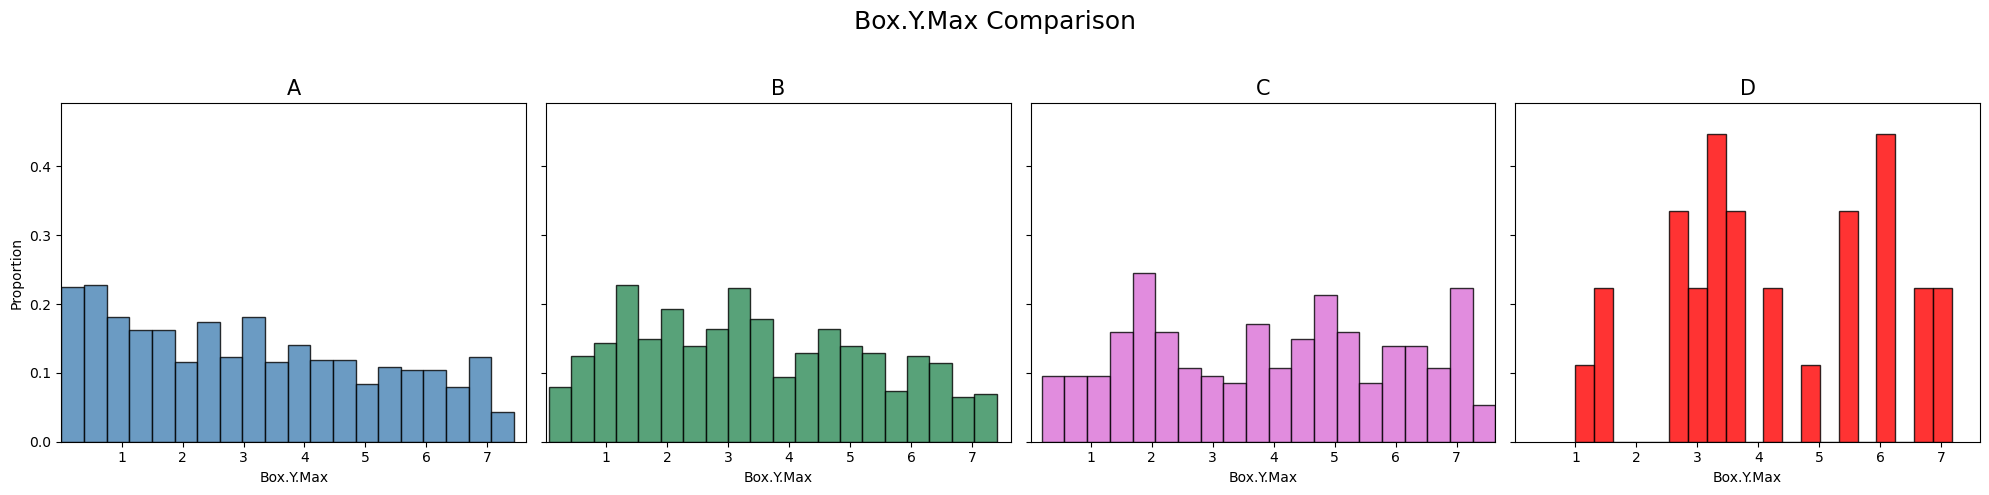

📈 Plotting: Box.Y.Min


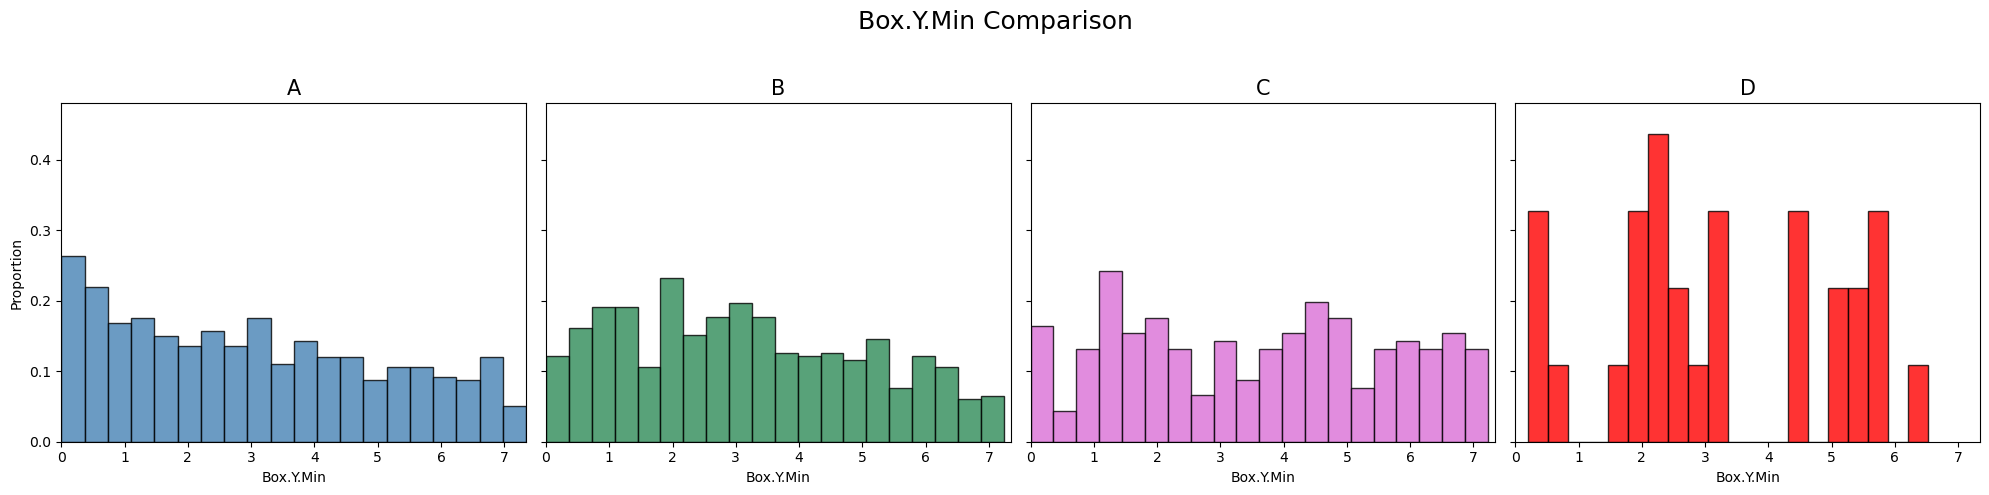

📈 Plotting: Centroid.X


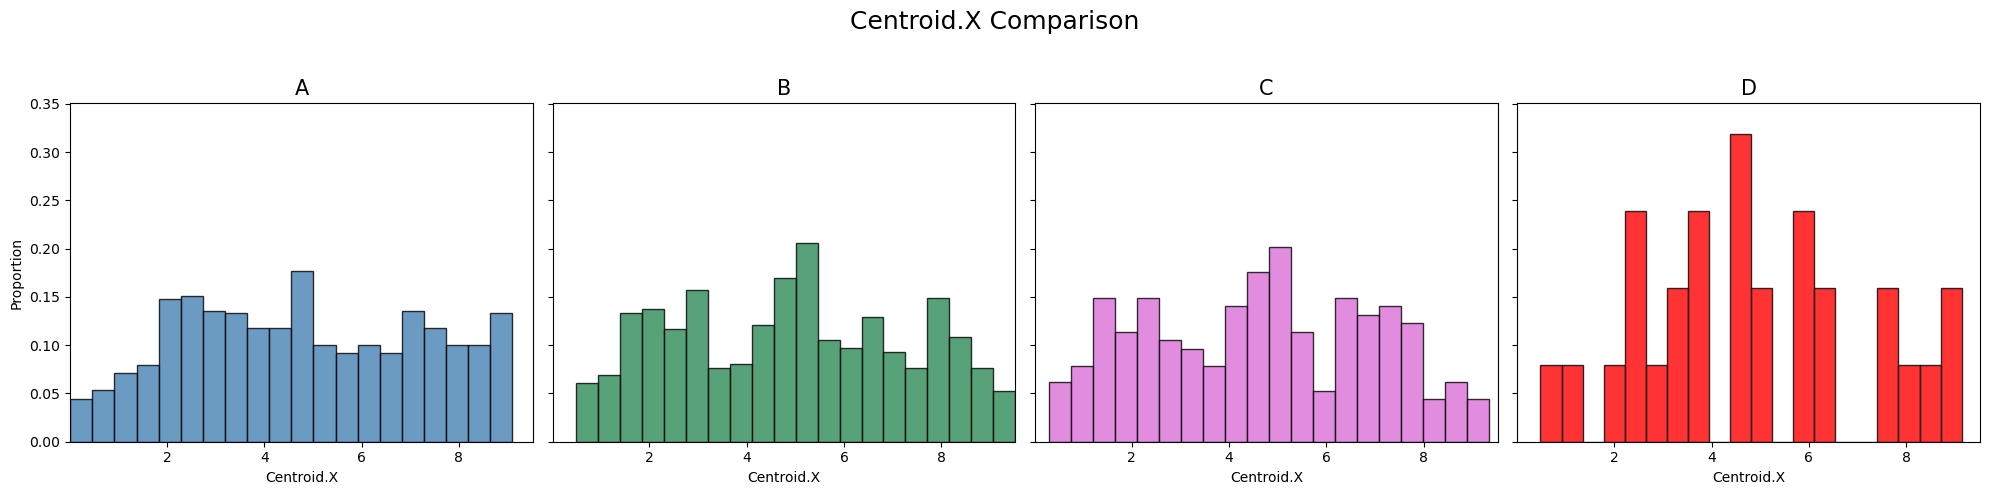

📈 Plotting: Centroid.Y


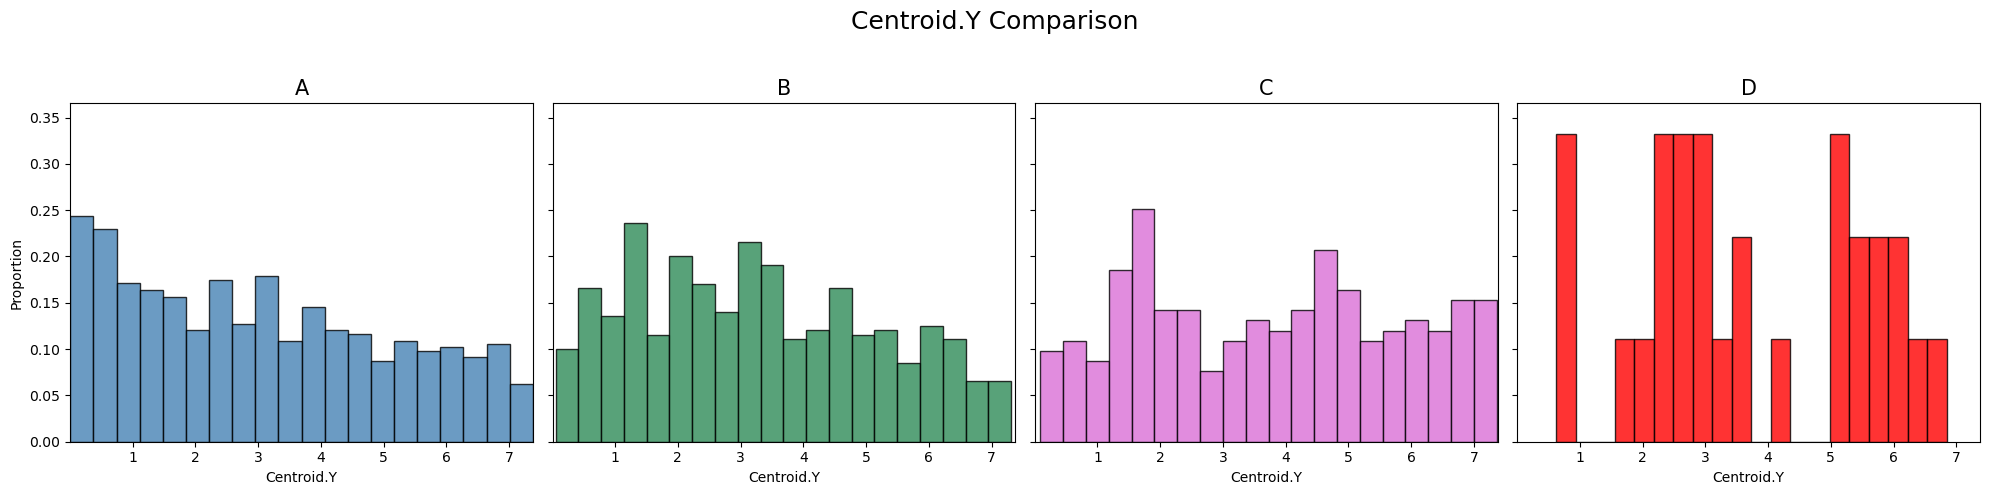

📈 Plotting: Circularity


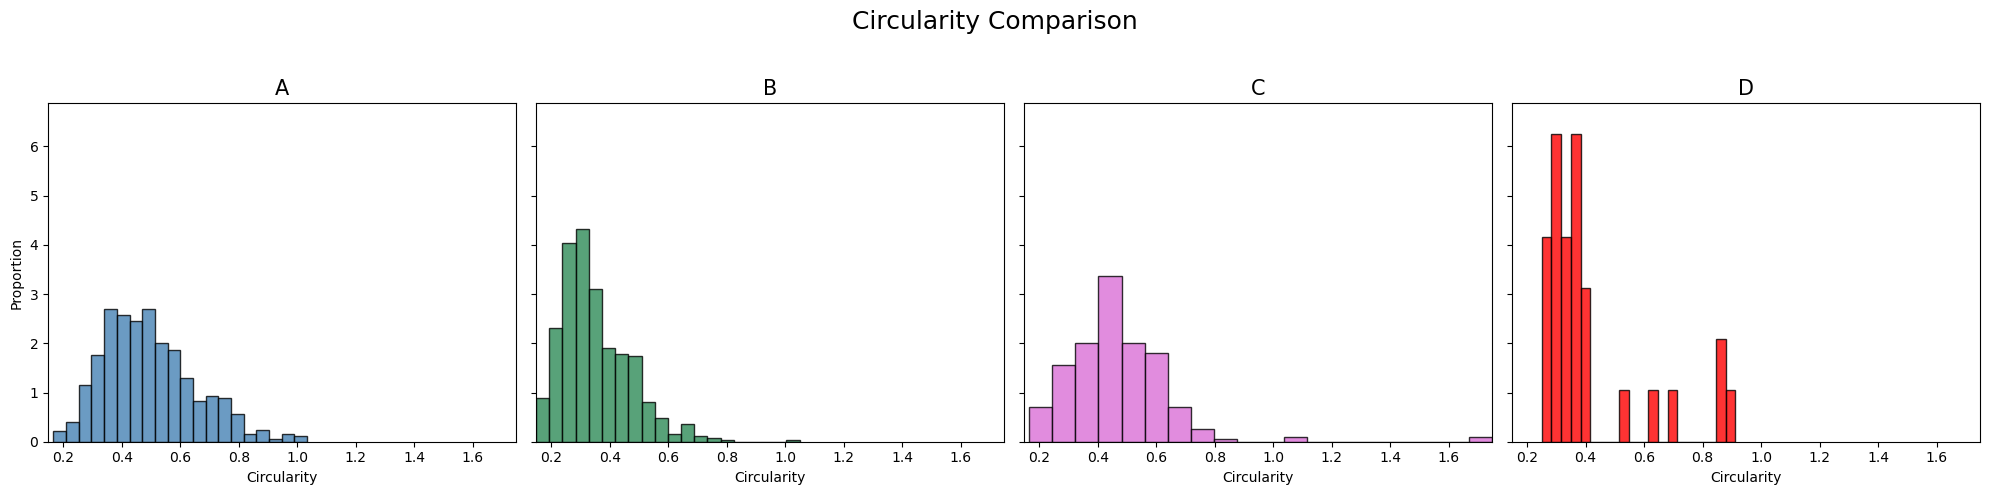

📈 Plotting: ConvexArea


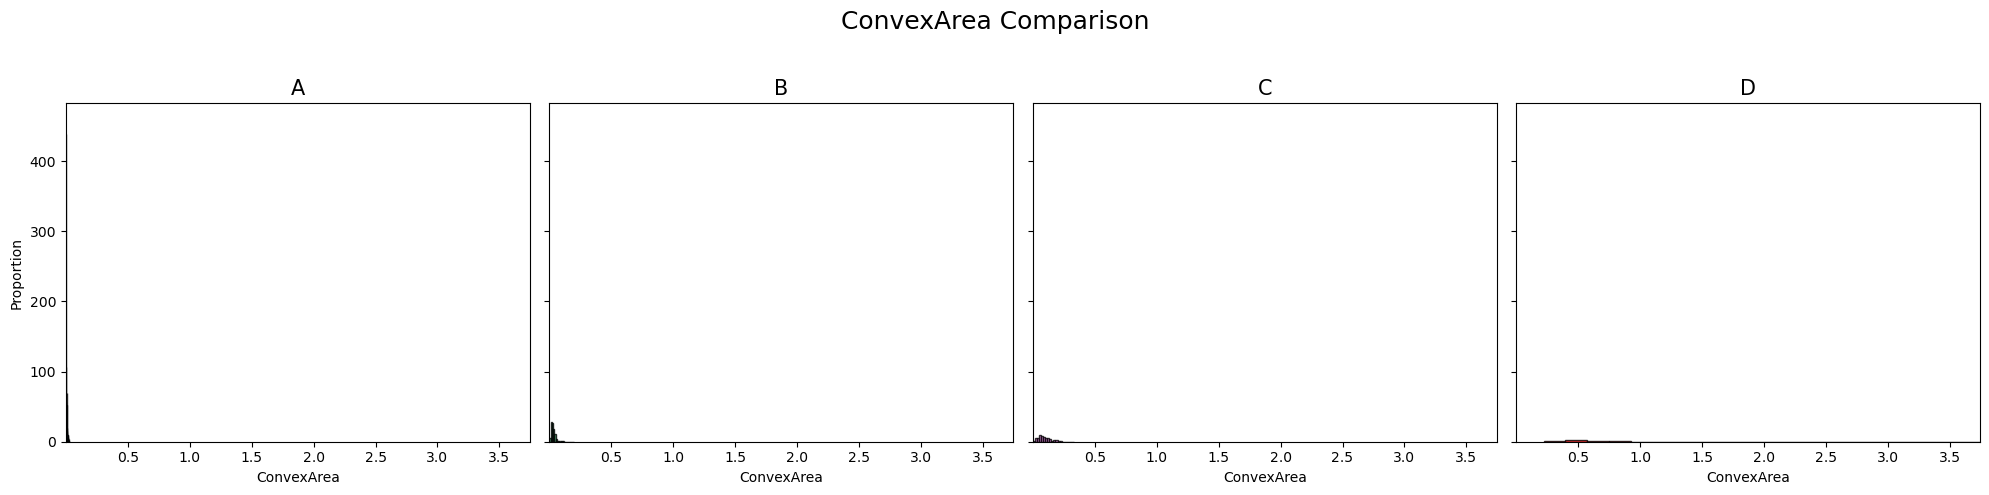

📈 Plotting: Convexity


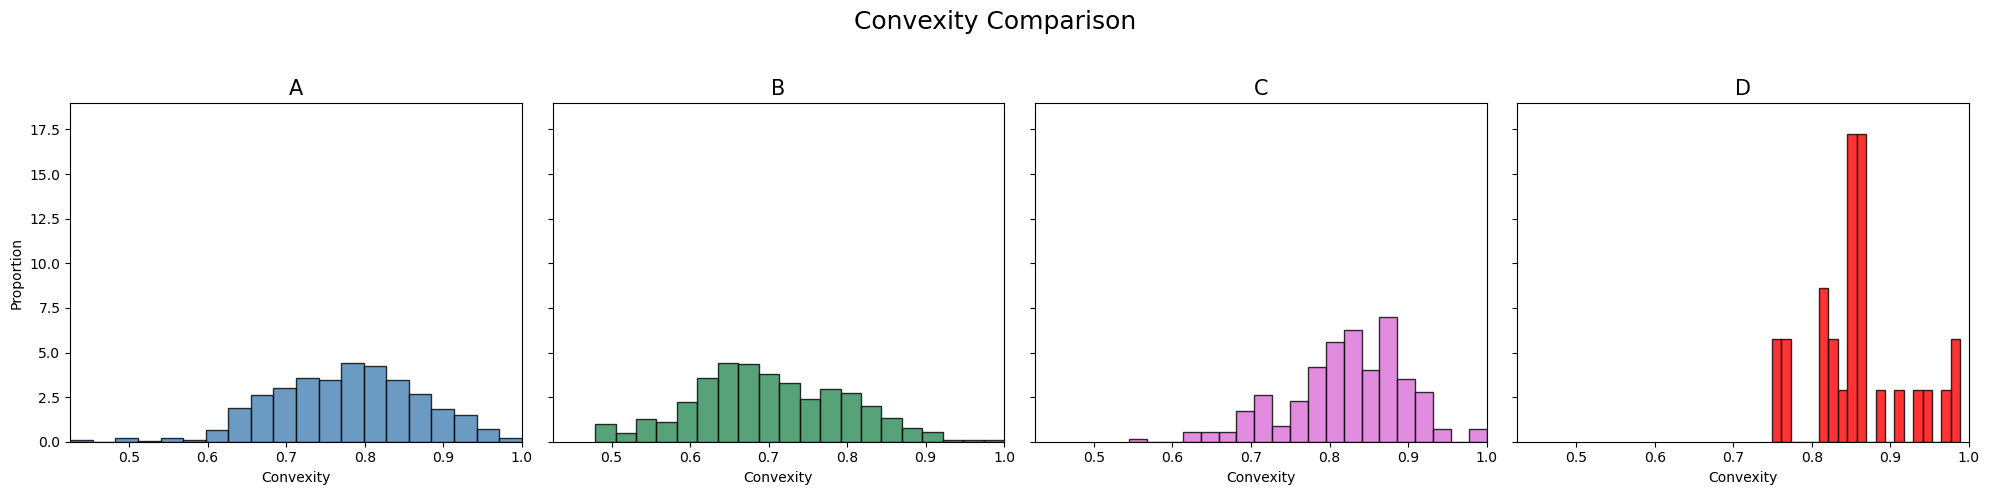

📈 Plotting: Ellipse.Center.X


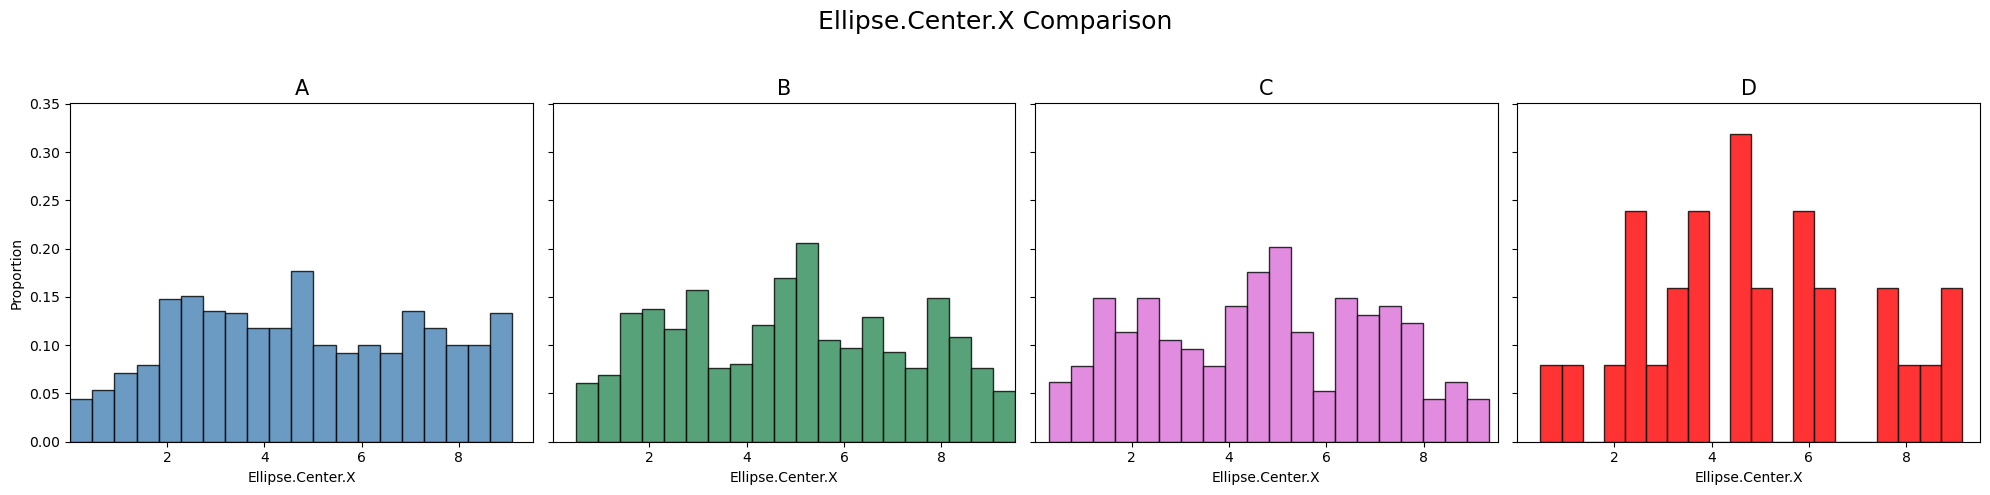

📈 Plotting: Ellipse.Center.Y


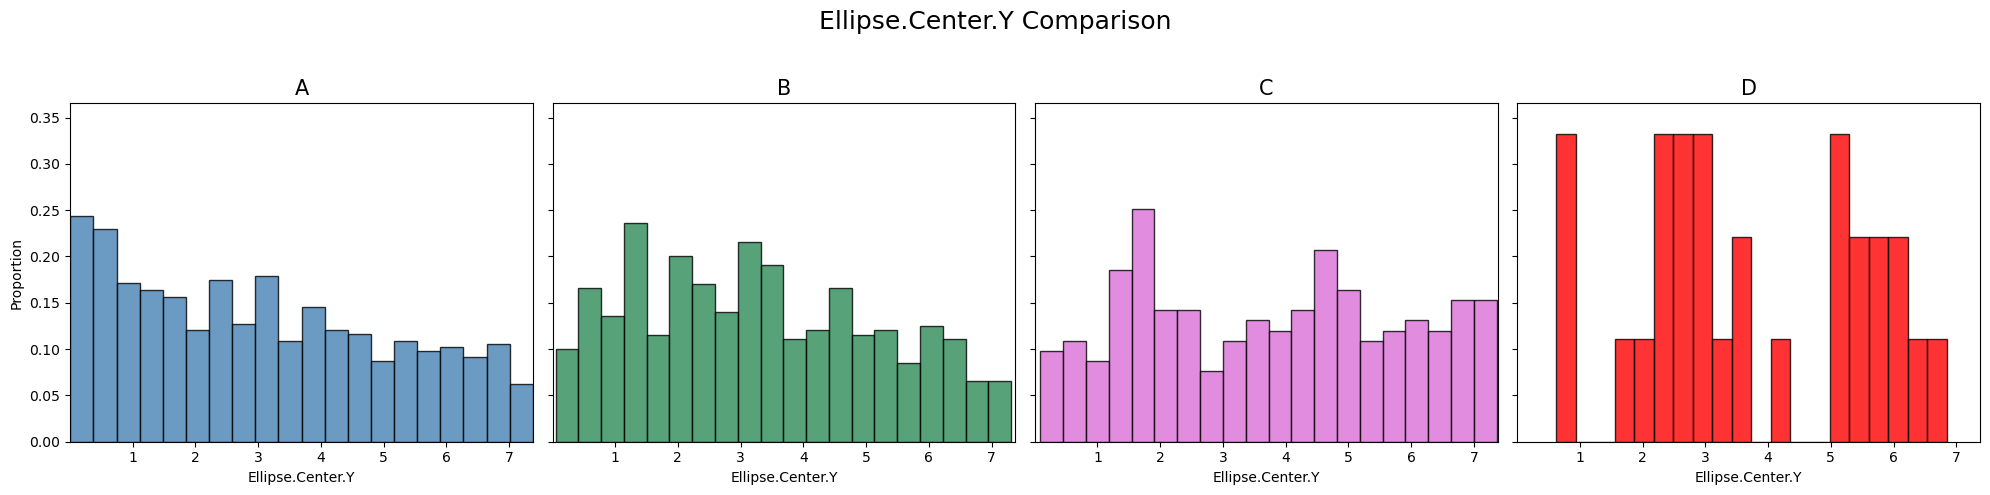

📈 Plotting: Ellipse.Elong


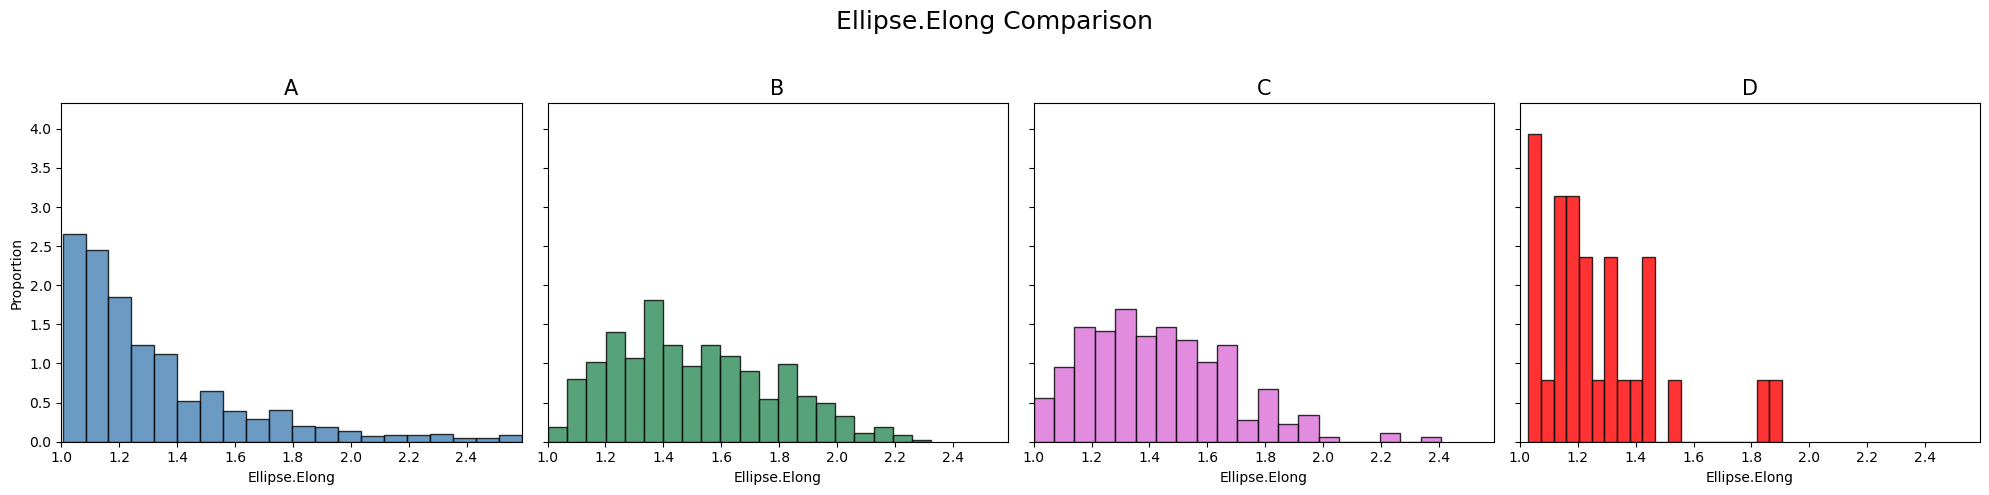

📈 Plotting: Ellipse.Orientation


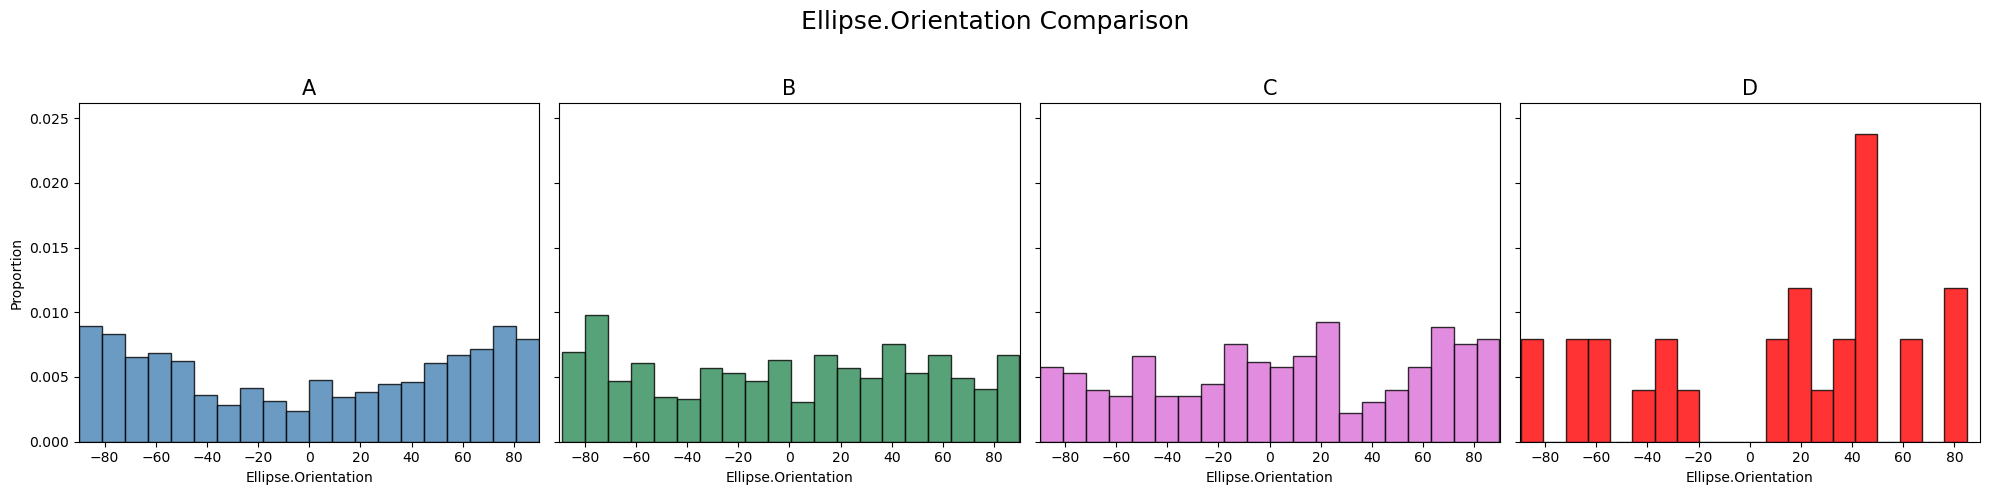

📈 Plotting: Ellipse.Radius1


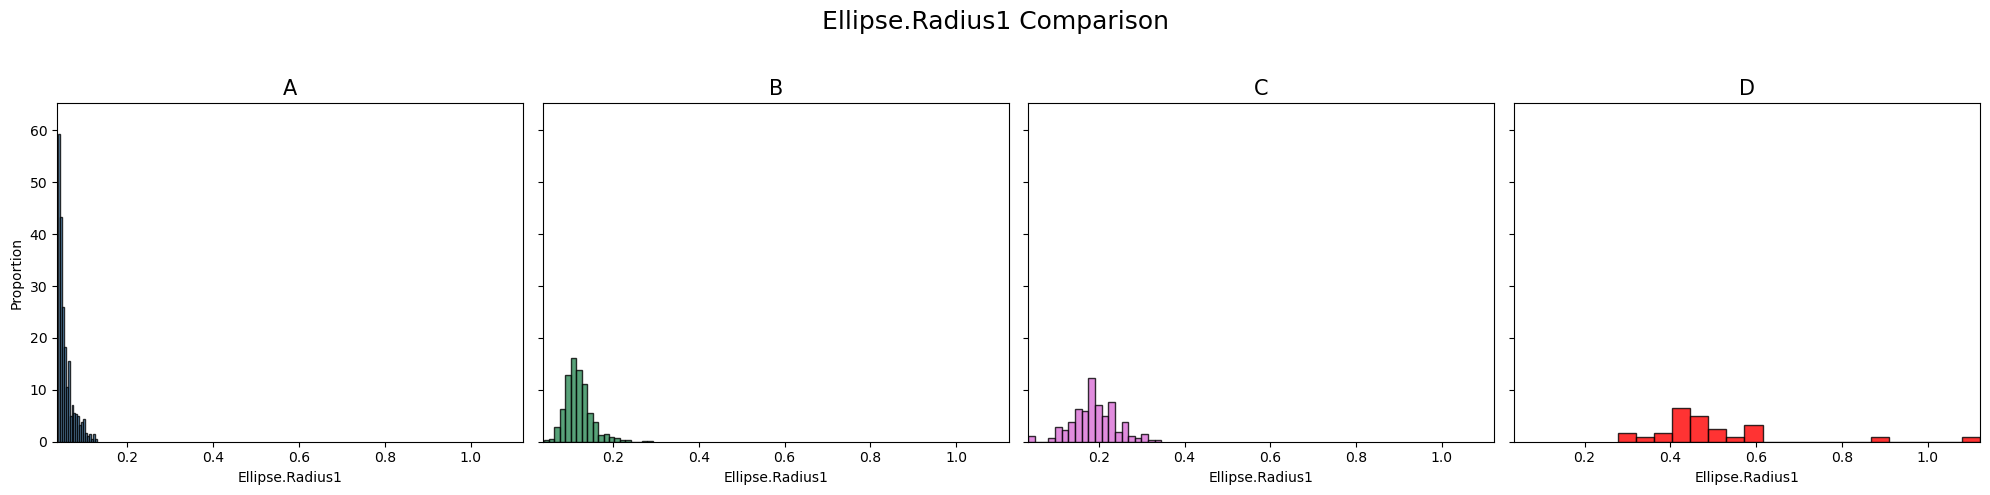

📈 Plotting: Ellipse.Radius2


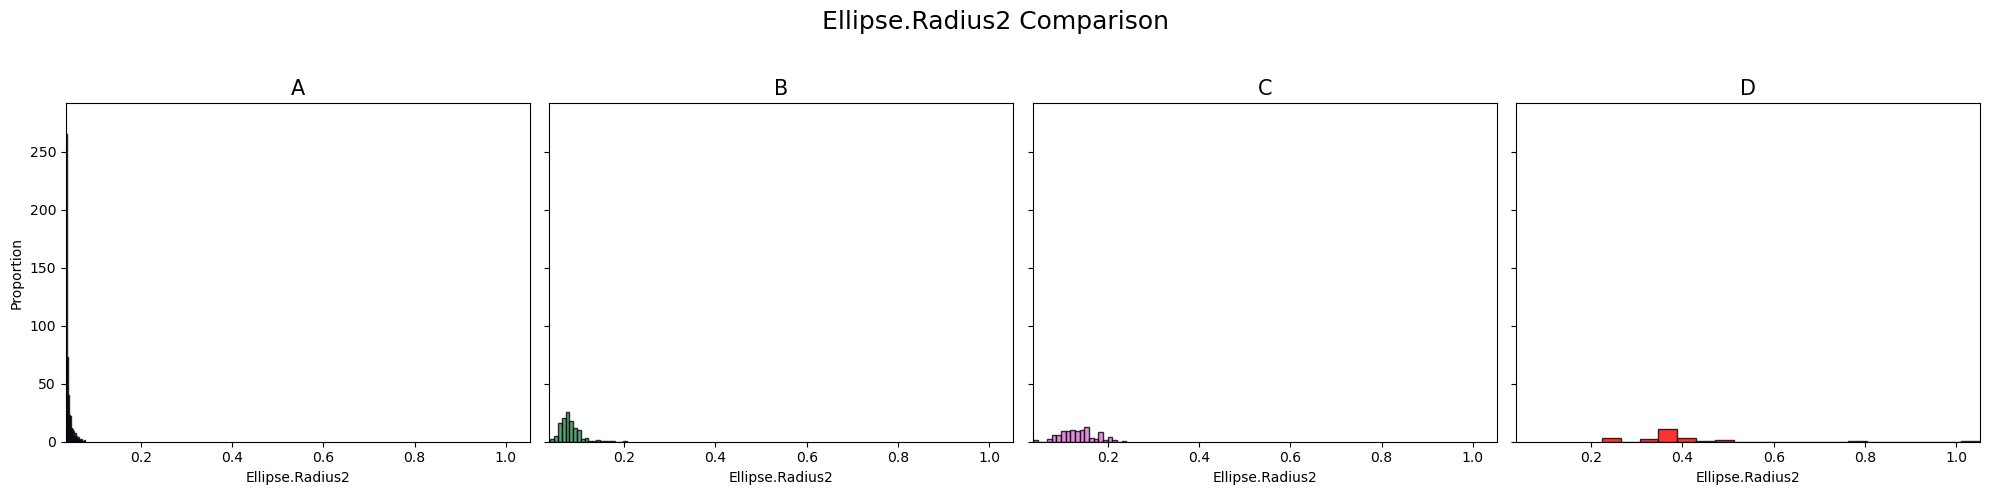

📈 Plotting: EulerNumber


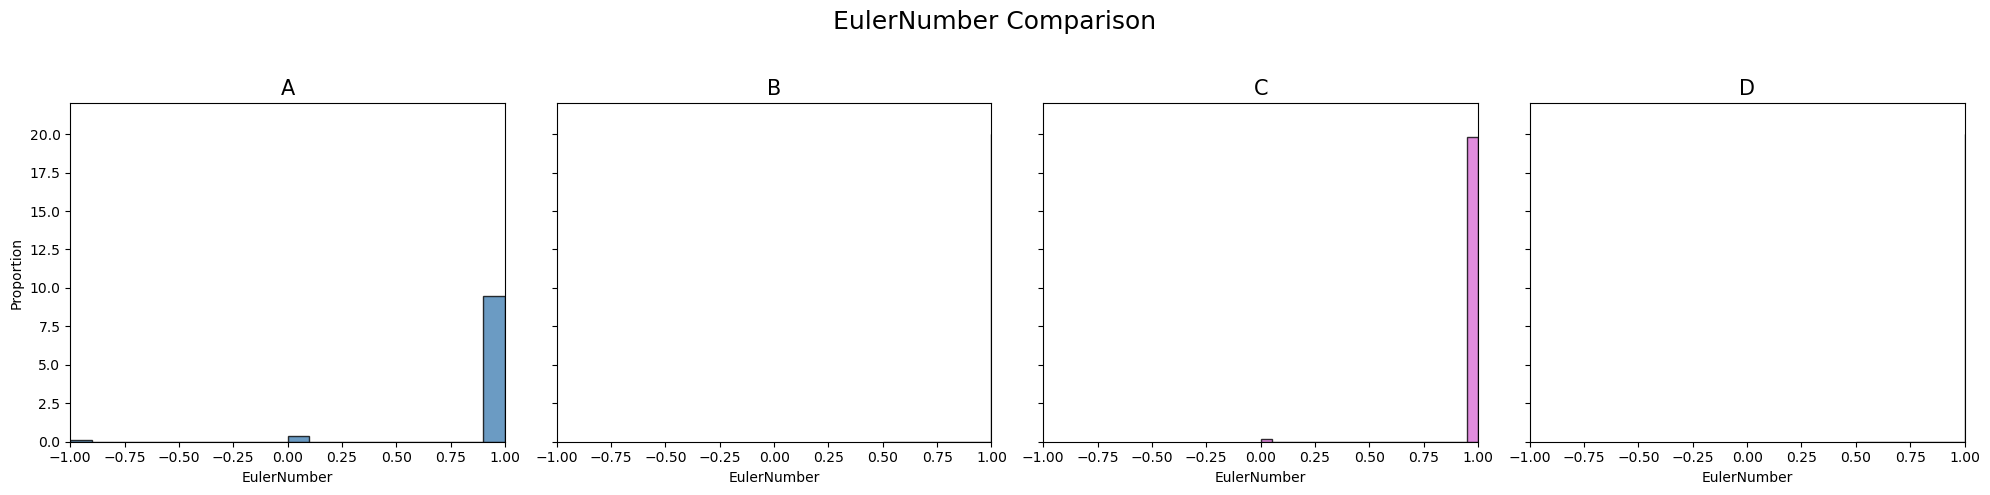

📈 Plotting: GeodesicDiameter


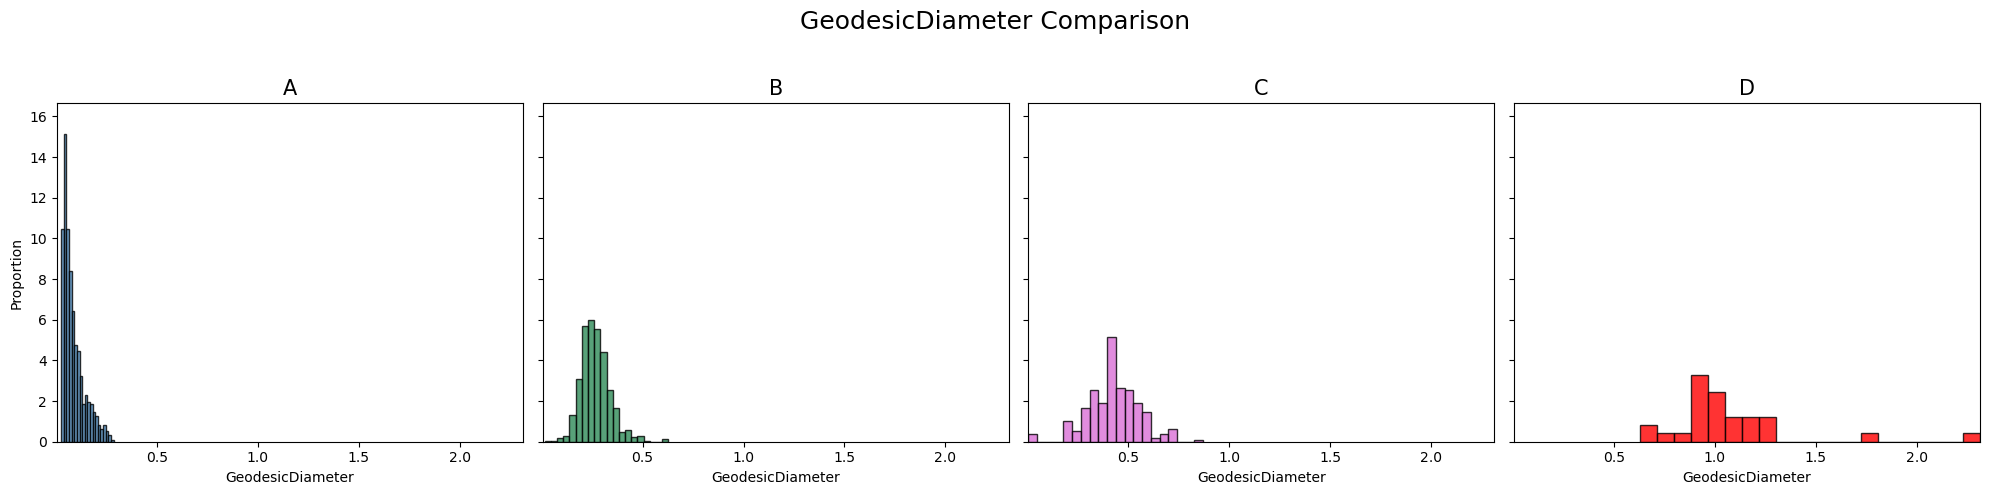

📈 Plotting: GeodesicElongation


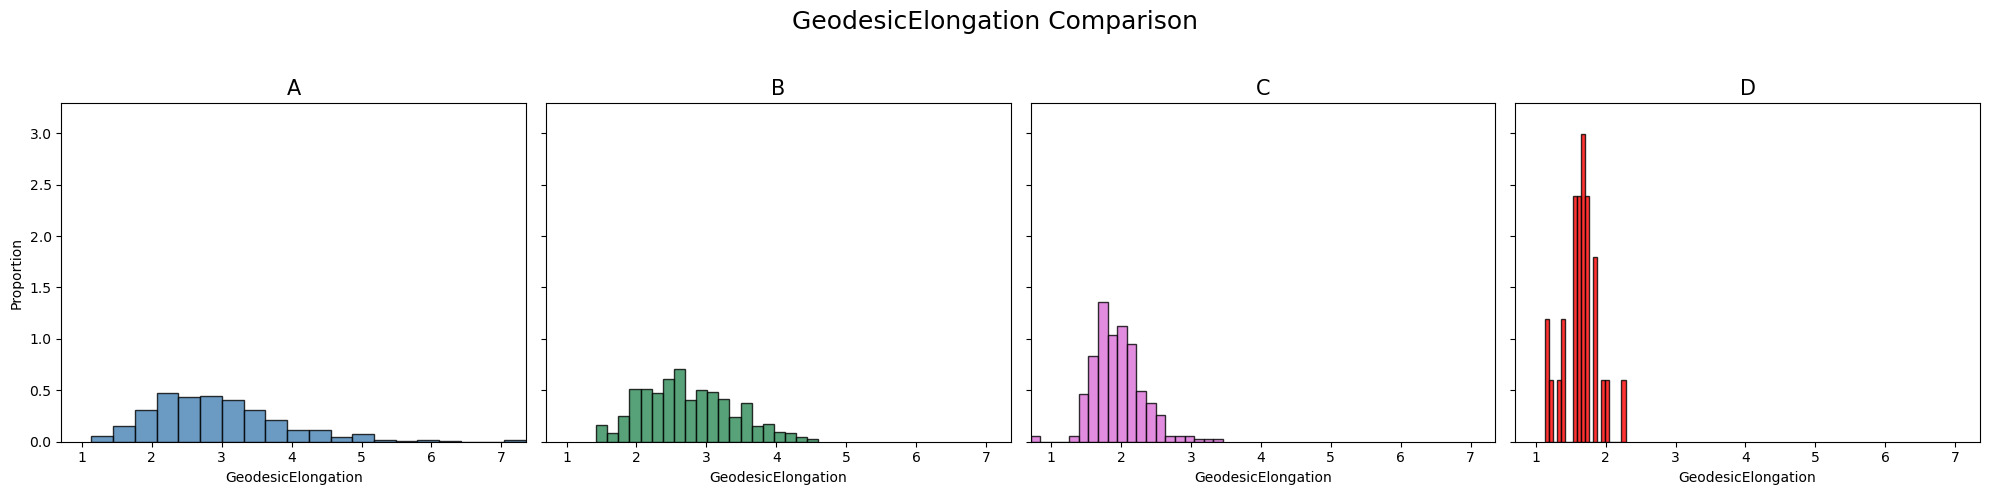

📈 Plotting: InscrDisc.Center.X


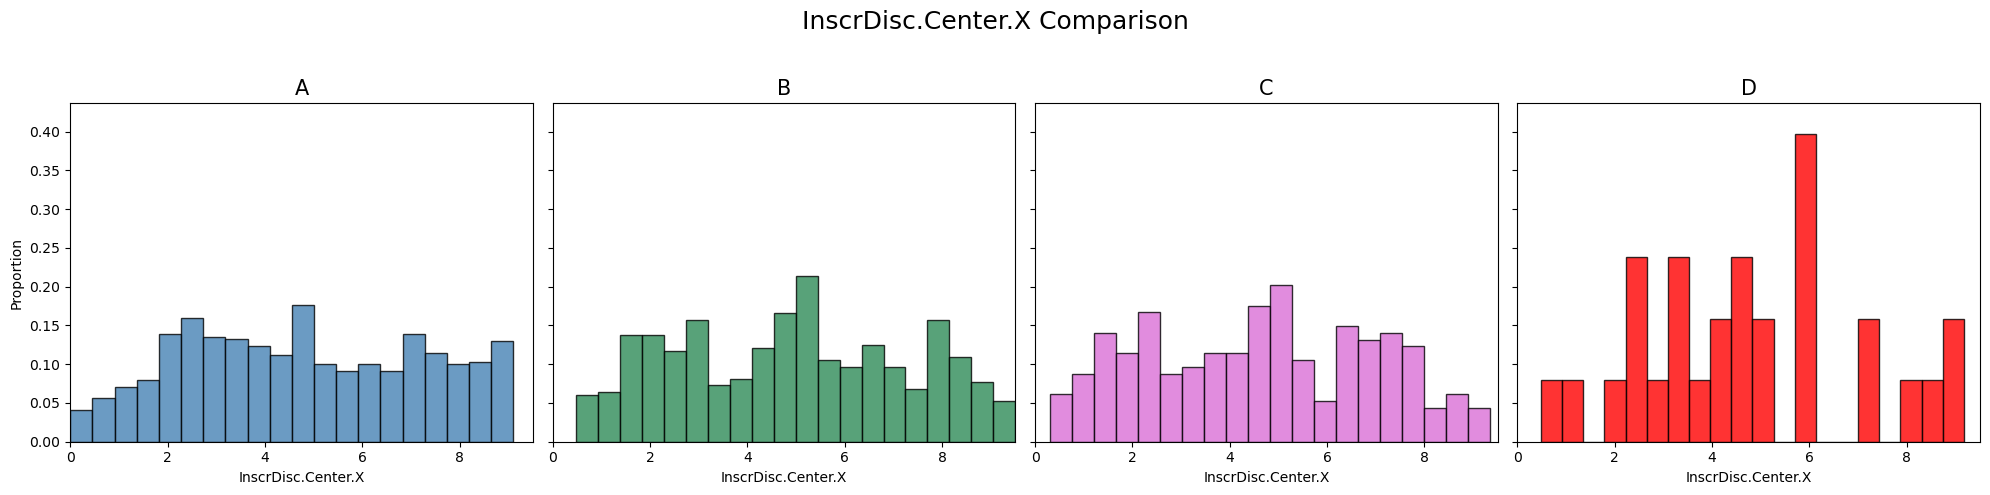

📈 Plotting: InscrDisc.Center.Y


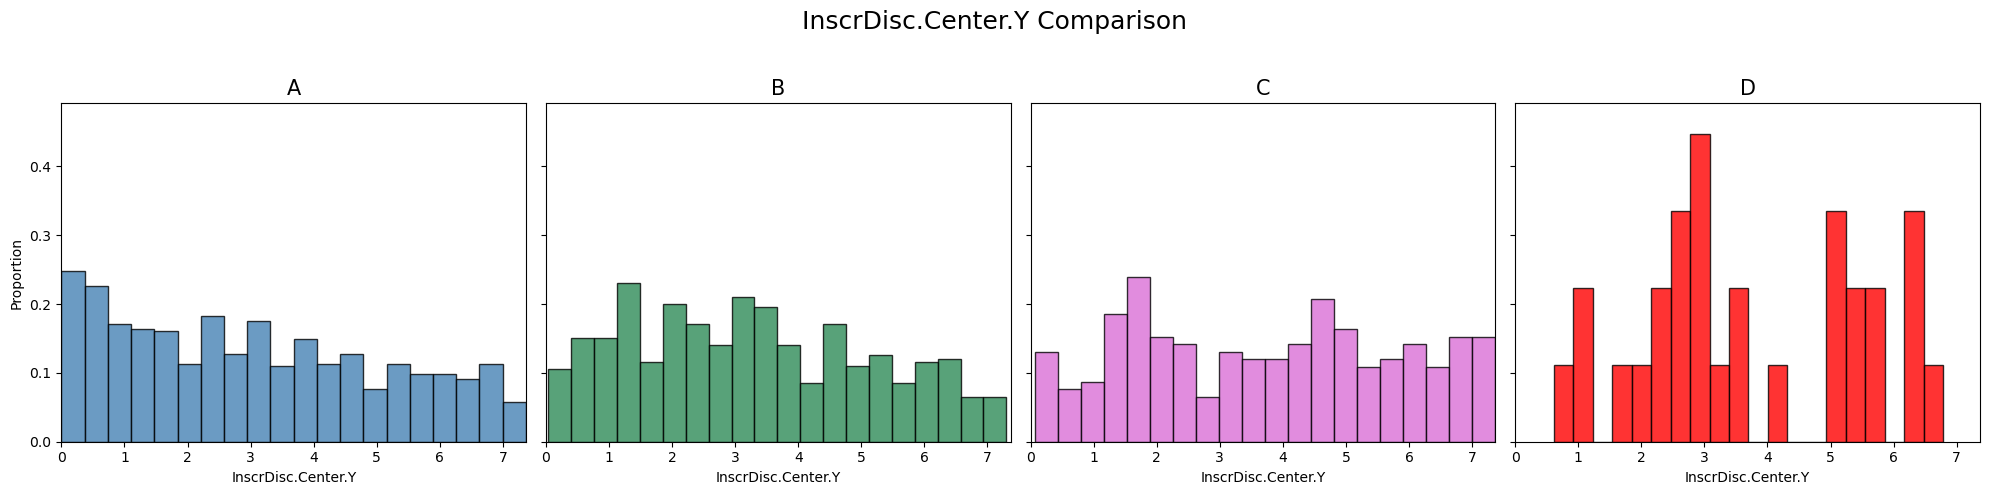

📈 Plotting: InscrDisc.Radius


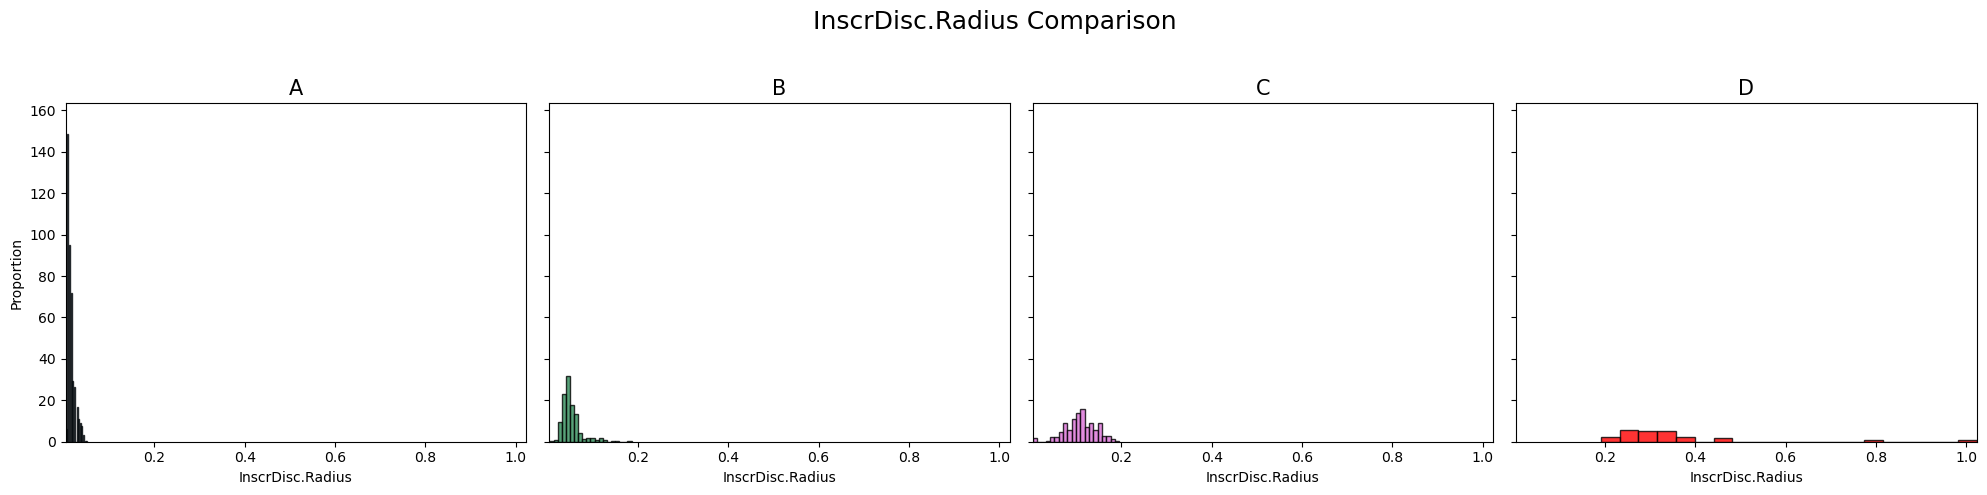

📈 Plotting: Label


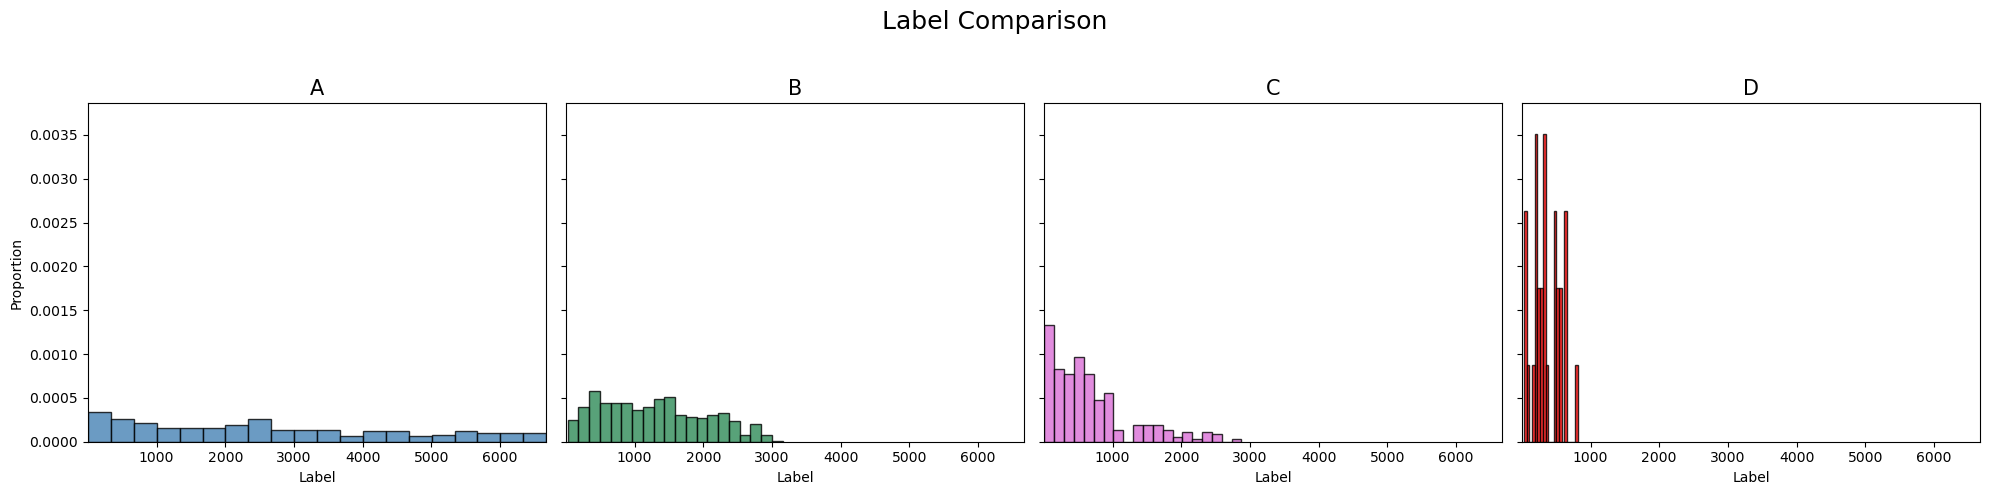

📈 Plotting: MaxFeretDiam


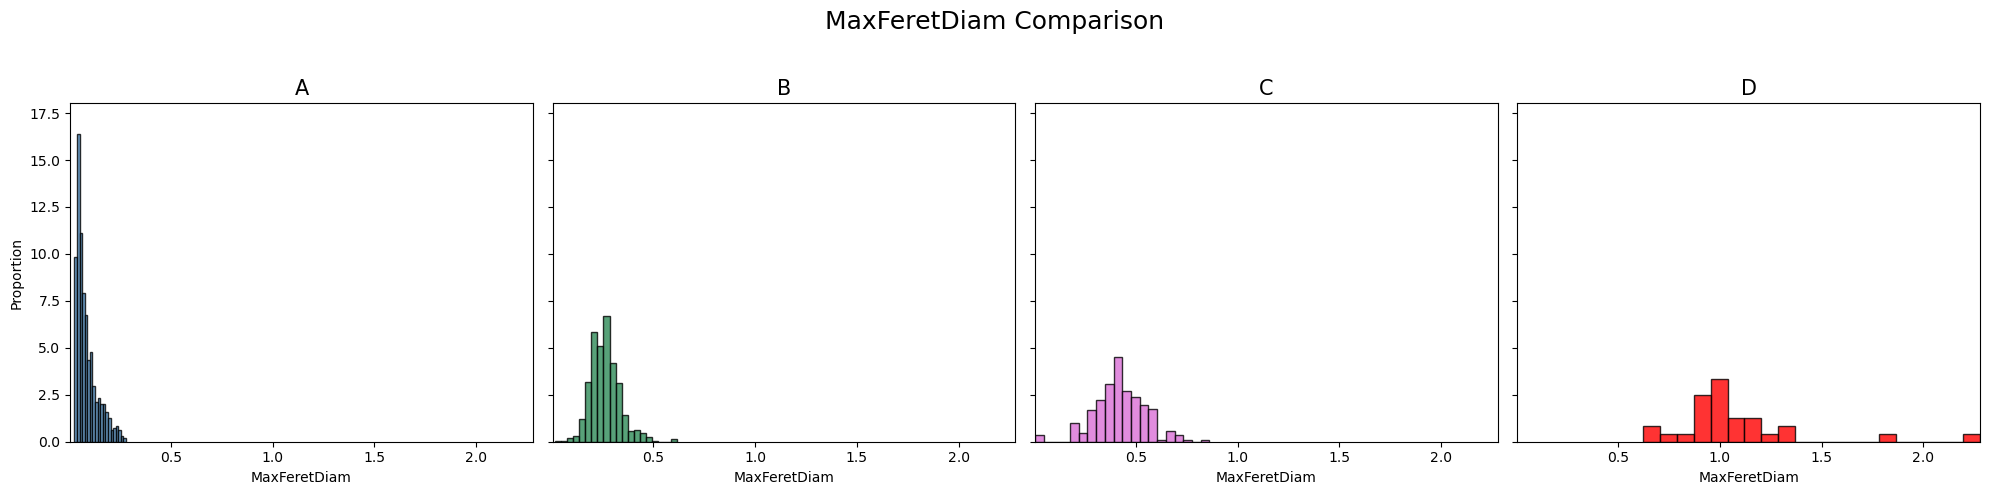

📈 Plotting: MaxFeretDiamAngle


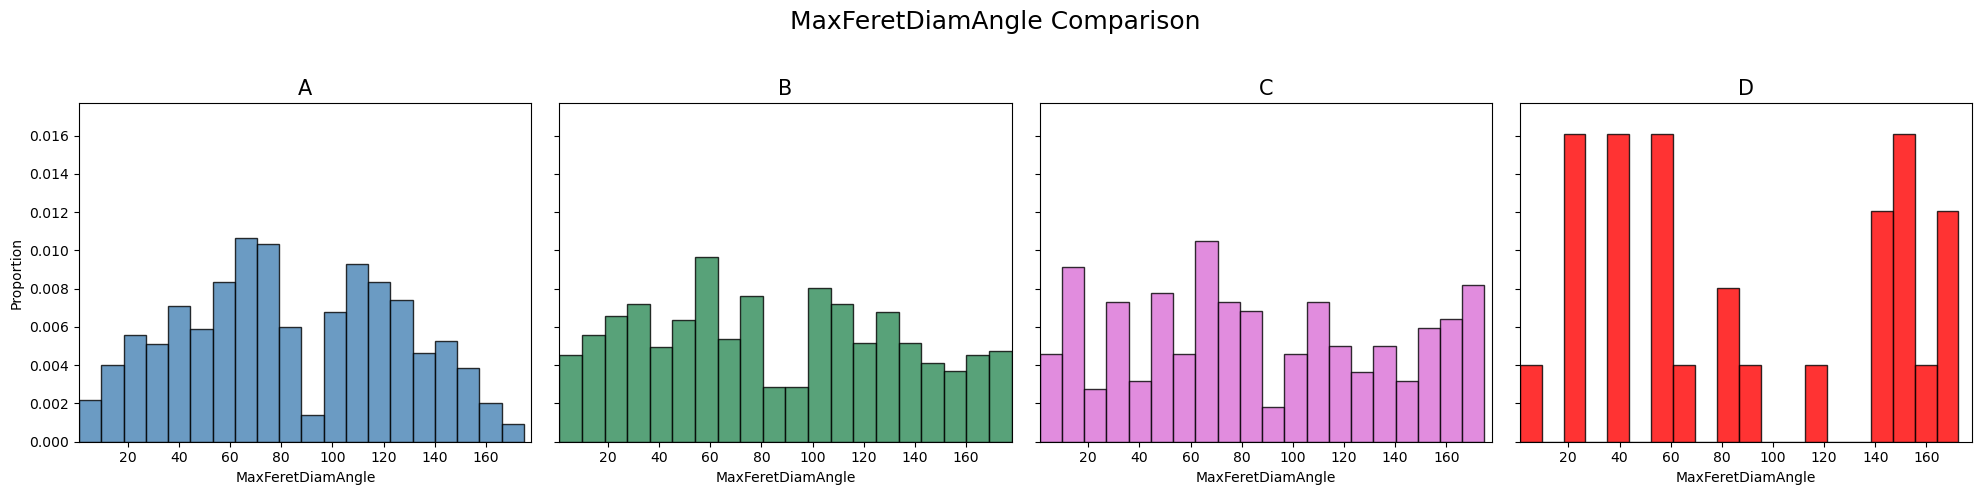

📈 Plotting: OBox.Center.X


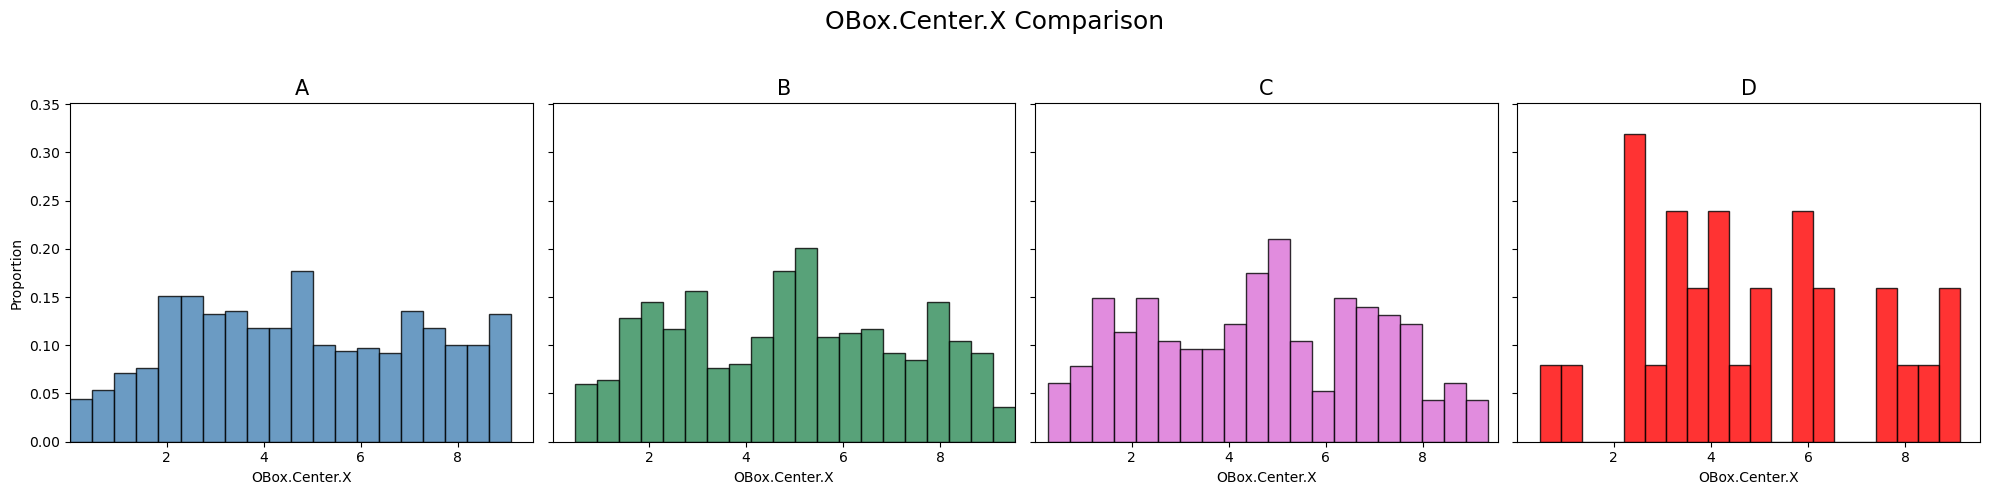

📈 Plotting: OBox.Center.Y


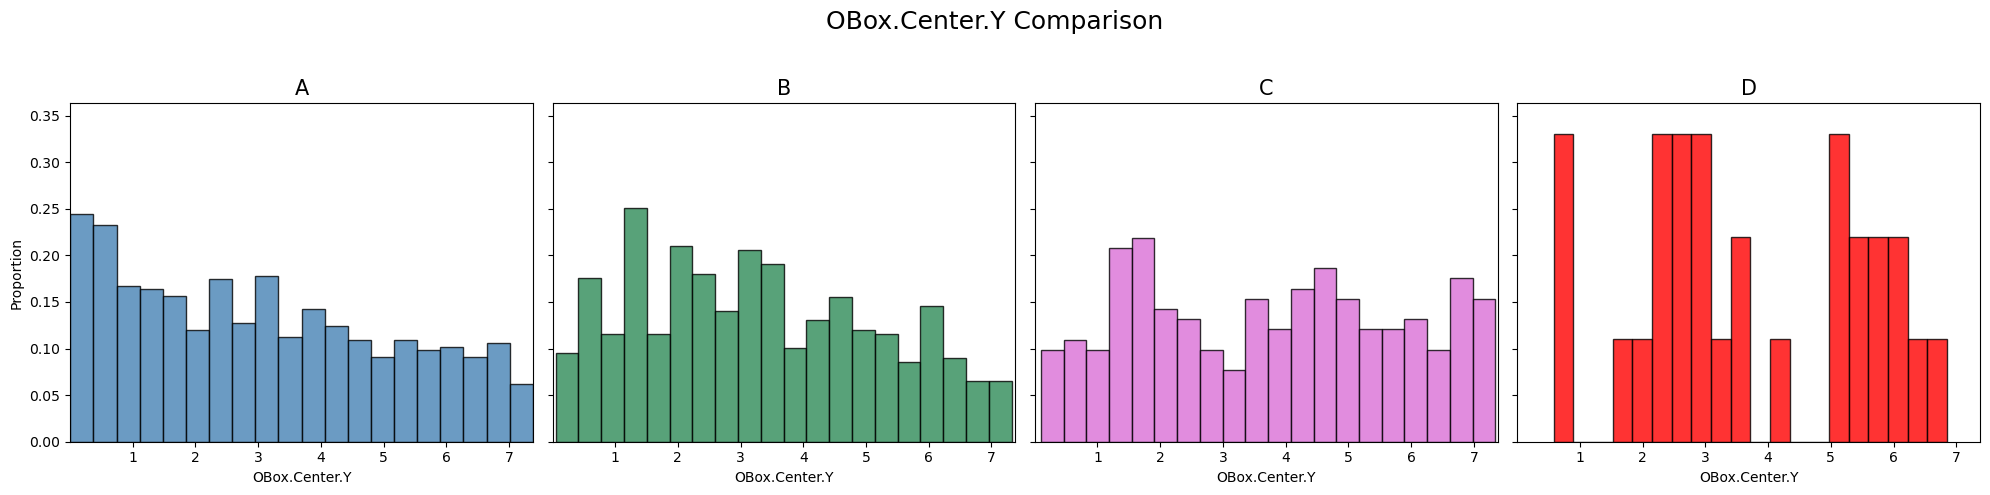

📈 Plotting: OBox.Length


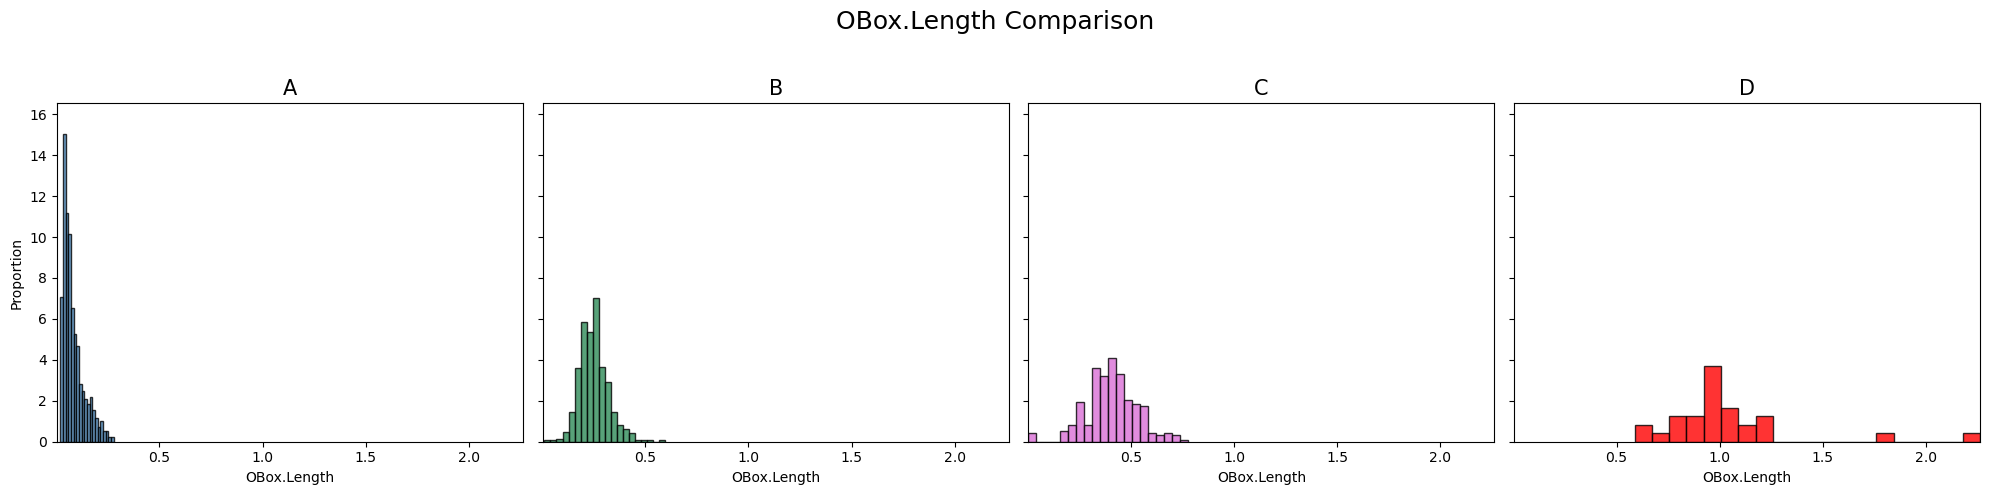

📈 Plotting: OBox.Orientation


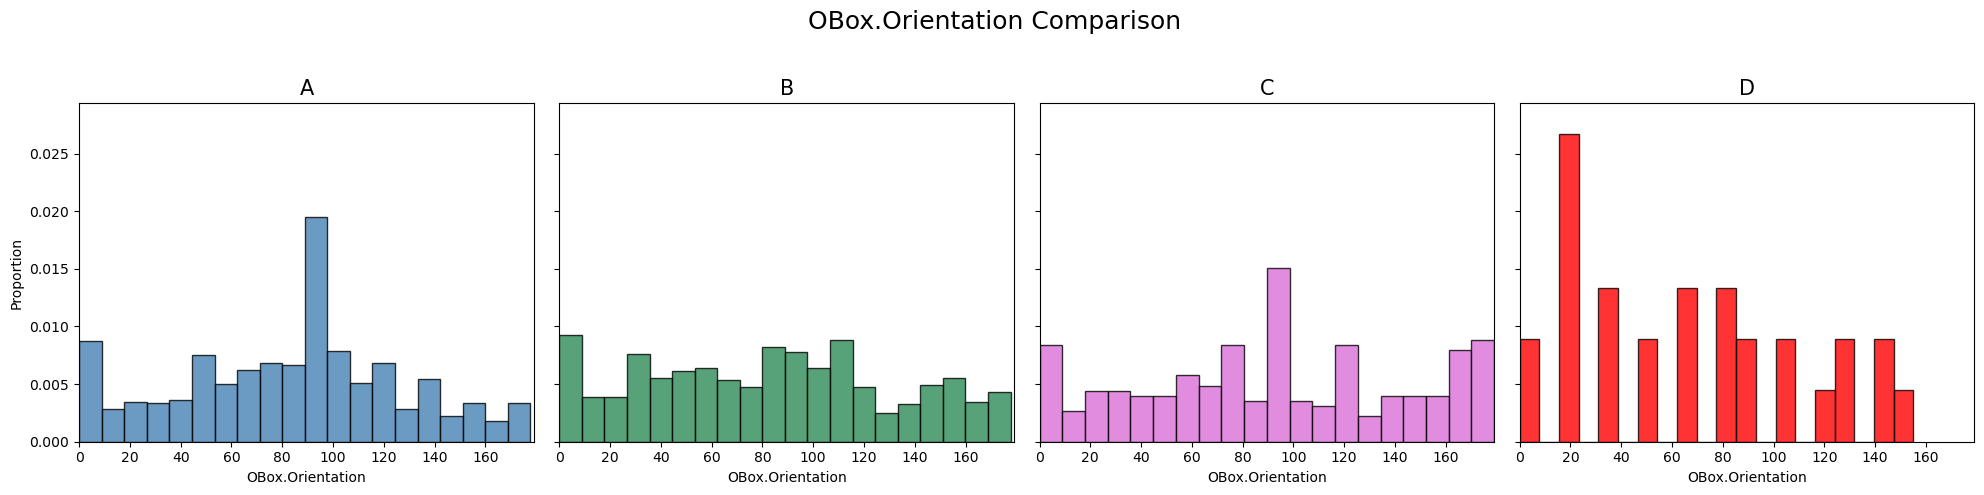

📈 Plotting: OBox.Width


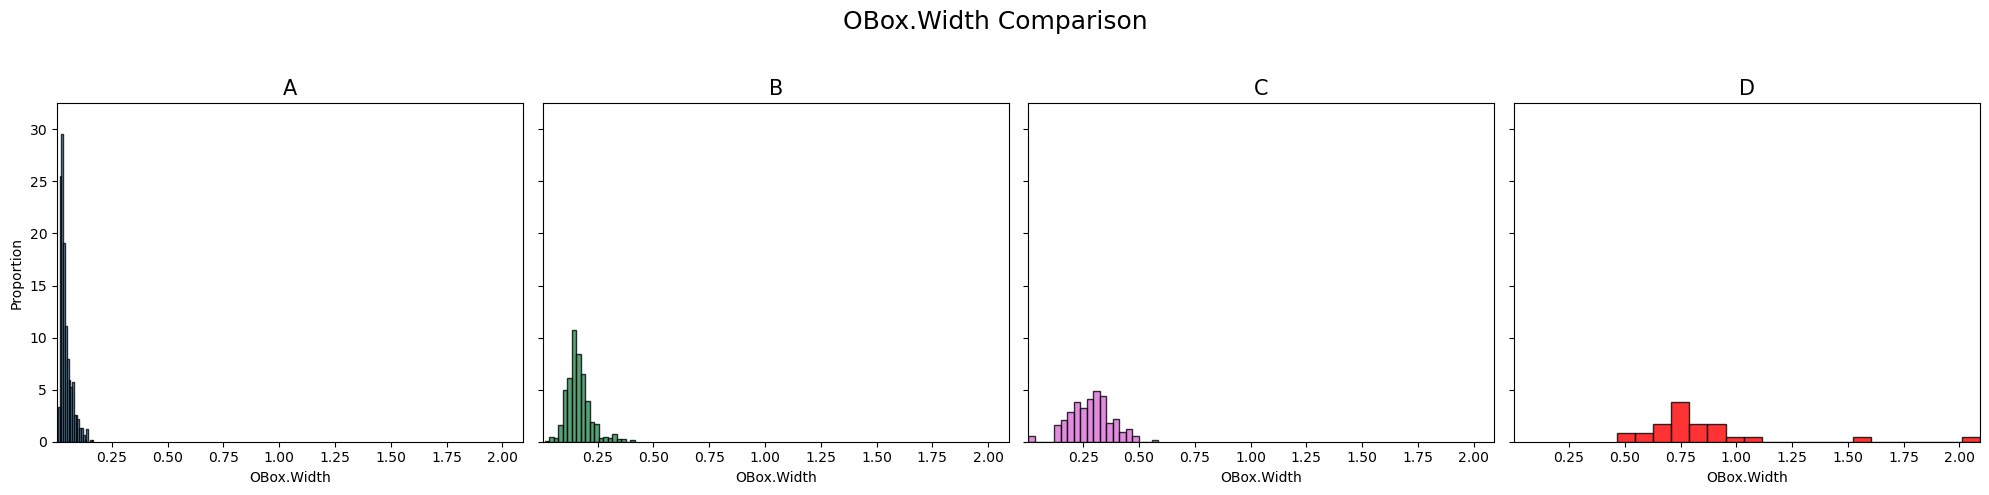

📈 Plotting: Perimeter


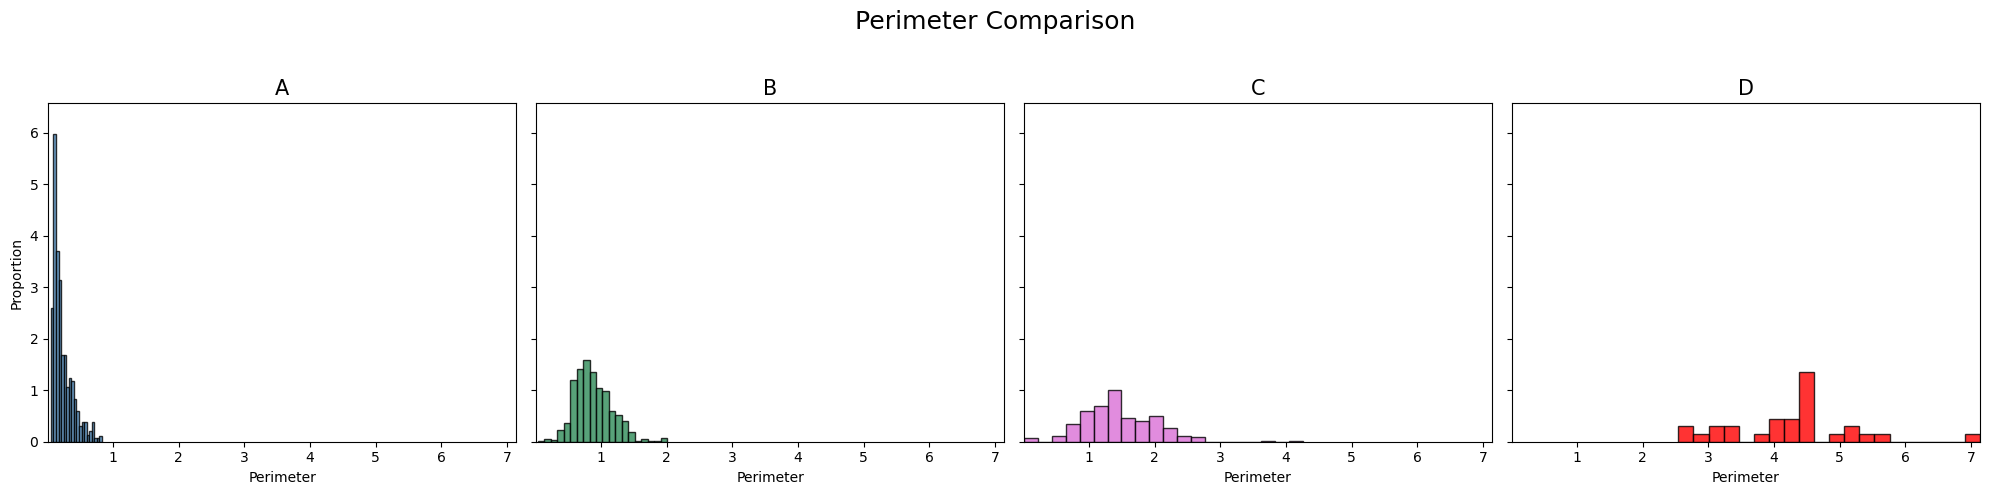

📈 Plotting: PixelCount


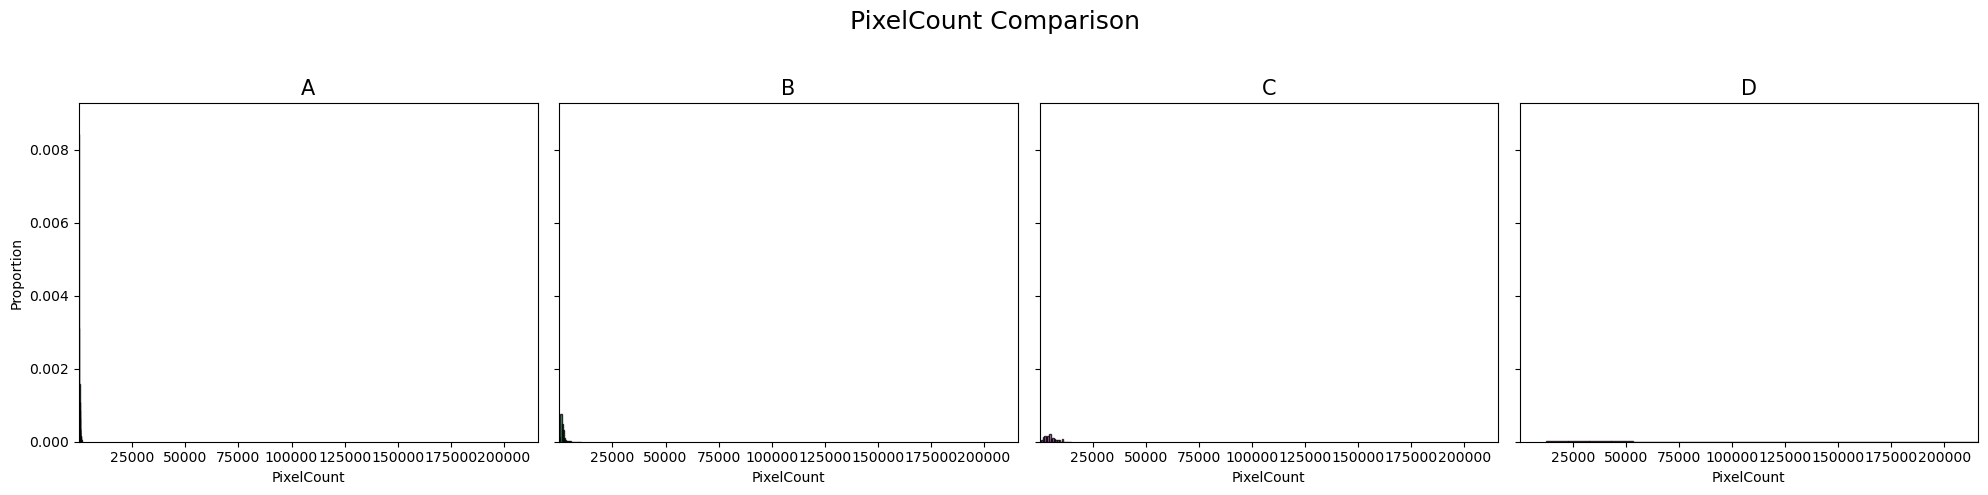

📈 Plotting: Tortuosity


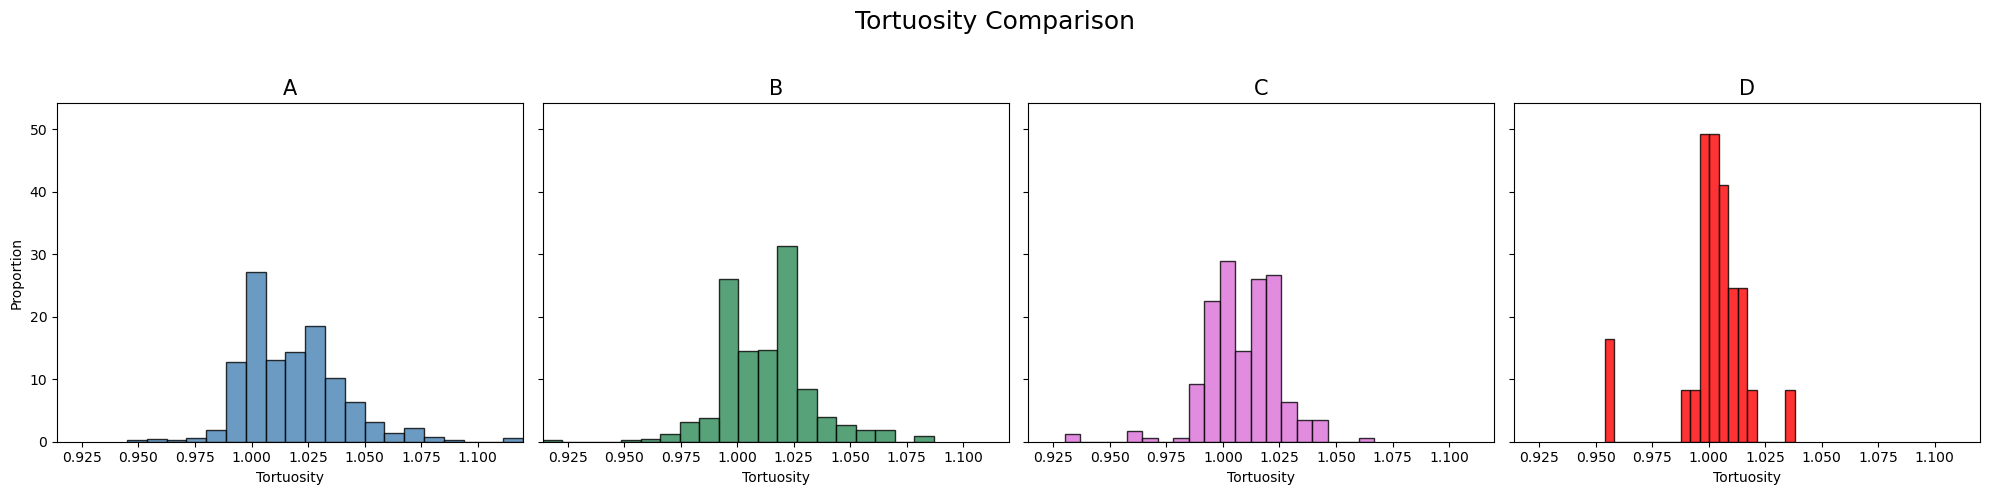

In [11]:
generate_all_histograms(dfA, dfB, dfC, dfD)

## Summary Statistics

In [4]:
generate_all_summaries(dfA, dfB, dfC, dfD)

📊 Summary statistics for all common numeric columns:


🔹 Area:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.00,0.00,0.00,0.00,0.00,0.00,0.02
B,549.0,0.02,0.02,0.00,0.01,0.02,0.03,0.18
C,252.0,0.08,0.04,0.00,0.05,0.07,0.10,0.24
D,29.0,0.67,0.68,0.18,0.40,0.48,0.65,3.70



🔹 AverageThickness:



,count,mean,std,min,25%,50%,75%,max
A,745.0,-0.98,0.01,-0.99,-0.99,-0.98,-0.98,-0.95
B,549.0,-0.95,0.02,-0.99,-0.96,-0.96,-0.95,-0.82
C,252.0,-0.91,0.03,-0.99,-0.92,-0.91,-0.89,-0.84
D,29.0,-0.71,0.27,-0.87,-0.83,-0.80,-0.76,0.53



🔹 Box.X.Max:



,count,mean,std,min,25%,50%,75%,max
A,745.0,4.82,2.43,0.02,2.78,4.70,7.00,9.11
B,549.0,5.03,2.37,0.59,3.00,5.08,6.92,9.59
C,252.0,4.80,2.34,0.35,2.75,4.81,6.83,9.53
D,29.0,5.28,2.33,0.85,3.69,4.87,6.52,10.24



🔹 Box.X.Min:



,count,mean,std,min,25%,50%,75%,max
A,745.0,4.77,2.44,0.00,2.72,4.61,6.93,9.10
B,549.0,4.82,2.37,0.41,2.80,4.83,6.74,9.45
C,252.0,4.45,2.33,0.15,2.39,4.47,6.37,9.18
D,29.0,4.34,2.26,0.14,2.80,3.89,5.73,8.58



🔹 Box.Y.Max:



,count,mean,std,min,25%,50%,75%,max
A,745.0,3.10,2.10,0.01,1.20,2.90,4.78,7.44
B,549.0,3.40,1.91,0.06,1.70,3.25,4.93,7.40
C,252.0,3.96,2.07,0.20,2.02,3.99,5.63,7.64
D,29.0,4.24,1.77,1.00,3.08,3.61,6.03,7.17



🔹 Box.Y.Min:



,count,mean,std,min,25%,50%,75%,max
A,745.0,3.03,2.10,0.0,1.14,2.81,4.71,7.35
B,549.0,3.18,1.91,0.0,1.54,2.99,4.64,7.23
C,252.0,3.60,2.08,0.0,1.69,3.67,5.41,7.23
D,29.0,3.27,1.85,0.2,2.05,2.87,4.96,6.53



🔹 Centroid.X:



,count,mean,std,min,25%,50%,75%,max
A,745.0,4.79,2.43,0.01,2.75,4.67,6.96,9.10
B,549.0,4.92,2.37,0.49,2.90,4.98,6.83,9.52
C,252.0,4.62,2.34,0.29,2.55,4.64,6.58,9.34
D,29.0,4.81,2.29,0.48,3.24,4.40,6.15,9.14



🔹 Centroid.Y:



,count,mean,std,min,25%,50%,75%,max
A,745.0,3.06,2.10,0.00,1.16,2.87,4.74,7.38
B,549.0,3.29,1.91,0.05,1.62,3.14,4.75,7.31
C,252.0,3.78,2.07,0.09,1.84,3.82,5.52,7.36
D,29.0,3.74,1.81,0.62,2.48,3.22,5.51,6.85



🔹 Circularity:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.49,0.16,0.17,0.37,0.48,0.59,1.03
B,549.0,0.35,0.12,0.15,0.27,0.33,0.42,1.05
C,252.0,0.47,0.18,0.16,0.35,0.44,0.55,1.75
D,29.0,0.41,0.19,0.25,0.30,0.35,0.40,0.91



🔹 ConvexArea:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.00,0.00,0.00,0.00,0.00,0.00,0.02
B,549.0,0.03,0.02,0.00,0.02,0.03,0.04,0.20
C,252.0,0.09,0.05,0.00,0.06,0.08,0.12,0.33
D,29.0,0.75,0.67,0.22,0.49,0.57,0.76,3.74



🔹 Convexity:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.78,0.09,0.42,0.71,0.78,0.84,1.00
B,549.0,0.70,0.10,0.48,0.64,0.69,0.78,1.00
C,252.0,0.82,0.07,0.55,0.78,0.83,0.88,1.00
D,29.0,0.86,0.06,0.75,0.83,0.85,0.86,0.99



🔹 Ellipse.Center.X:



,count,mean,std,min,25%,50%,75%,max
A,745.0,4.79,2.43,0.01,2.75,4.67,6.96,9.10
B,549.0,4.92,2.37,0.49,2.90,4.98,6.83,9.52
C,252.0,4.62,2.34,0.29,2.55,4.64,6.58,9.34
D,29.0,4.81,2.29,0.48,3.24,4.40,6.15,9.14



🔹 Ellipse.Center.Y:



,count,mean,std,min,25%,50%,75%,max
A,745.0,3.06,2.10,0.00,1.16,2.87,4.74,7.38
B,549.0,3.29,1.91,0.05,1.62,3.14,4.75,7.31
C,252.0,3.78,2.07,0.09,1.84,3.82,5.52,7.36
D,29.0,3.74,1.81,0.62,2.48,3.22,5.51,6.85



🔹 Ellipse.Elong:



,count,mean,std,min,25%,50%,75%,max
A,745.0,1.32,0.31,1.00,1.10,1.21,1.42,2.59
B,549.0,1.51,0.28,1.00,1.30,1.47,1.69,2.33
C,252.0,1.43,0.25,1.00,1.24,1.39,1.59,2.41
D,29.0,1.27,0.22,1.03,1.13,1.24,1.38,1.91



🔹 Ellipse.Orientation:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.81,59.36,-89.95,-58.87,5.37,58.79,90.00
B,549.0,-0.59,53.70,-88.71,-50.74,0.59,45.00,89.93
C,252.0,6.28,53.12,-89.66,-37.32,7.06,55.13,89.86
D,29.0,8.35,53.89,-89.42,-34.76,18.53,45.18,84.73



🔹 Ellipse.Radius1:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.06,0.02,0.04,0.04,0.05,0.06,0.13
B,549.0,0.12,0.03,0.04,0.10,0.12,0.13,0.29
C,252.0,0.19,0.05,0.04,0.16,0.19,0.22,0.35
D,29.0,0.49,0.17,0.28,0.43,0.46,0.52,1.12



🔹 Ellipse.Radius2:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.04,0.01,0.04,0.04,0.04,0.04,0.08
B,549.0,0.08,0.02,0.04,0.07,0.08,0.09,0.20
C,252.0,0.13,0.04,0.04,0.11,0.14,0.16,0.24
D,29.0,0.40,0.16,0.22,0.35,0.36,0.39,1.05



🔹 EulerNumber:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.94,0.28,-1.0,1.0,1.0,1.0,1.0
B,549.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0
C,252.0,0.99,0.09,0.0,1.0,1.0,1.0,1.0
D,29.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0



🔹 GeodesicDiameter:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.09,0.05,0.03,0.05,0.07,0.11,0.28
B,549.0,0.27,0.07,0.02,0.22,0.26,0.31,0.63
C,252.0,0.43,0.13,0.00,0.35,0.43,0.51,0.87
D,29.0,1.07,0.32,0.63,0.93,1.00,1.14,2.31



🔹 GeodesicElongation:



,count,mean,std,min,25%,50%,75%,max
A,745.0,2.94,0.94,1.14,2.25,2.77,3.50,7.35
B,549.0,2.73,0.64,1.42,2.23,2.67,3.17,4.60
C,252.0,1.95,0.36,0.71,1.71,1.93,2.15,3.46
D,29.0,1.64,0.25,1.13,1.56,1.68,1.72,2.28



🔹 InscrDisc.Center.X:



,count,mean,std,min,25%,50%,75%,max
A,745.0,4.79,2.43,0.00,2.76,4.66,6.96,9.10
B,549.0,4.92,2.37,0.48,2.89,4.98,6.85,9.50
C,252.0,4.61,2.34,0.30,2.51,4.63,6.58,9.34
D,29.0,4.79,2.30,0.48,3.18,4.42,6.11,9.17



🔹 InscrDisc.Center.Y:



,count,mean,std,min,25%,50%,75%,max
A,745.0,3.06,2.10,0.00,1.15,2.86,4.74,7.37
B,549.0,3.28,1.91,0.04,1.60,3.13,4.75,7.30
C,252.0,3.77,2.07,0.07,1.84,3.81,5.50,7.37
D,29.0,3.74,1.80,0.61,2.50,3.23,5.47,6.78



🔹 InscrDisc.Radius:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.01,0.01,0.00,0.01,0.01,0.02,0.05
B,549.0,0.05,0.02,0.00,0.04,0.05,0.06,0.19
C,252.0,0.11,0.03,0.00,0.09,0.11,0.13,0.20
D,29.0,0.34,0.17,0.19,0.26,0.30,0.34,1.02



🔹 Label:



,count,mean,std,min,25%,50%,75%,max
A,745.0,2642.59,1939.62,1.0,935.0,2365.0,4141.00,6670.0
B,549.0,1276.77,752.62,26.0,625.0,1231.0,1838.00,3156.0
C,252.0,671.44,602.04,9.0,202.0,502.0,893.25,2876.0
D,29.0,353.38,204.28,31.0,209.0,310.0,527.00,817.0



🔹 MaxFeretDiam:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.08,0.05,0.02,0.04,0.06,0.11,0.28
B,549.0,0.26,0.07,0.02,0.21,0.26,0.30,0.61
C,252.0,0.42,0.13,0.00,0.35,0.42,0.50,0.86
D,29.0,1.07,0.32,0.62,0.92,1.00,1.13,2.28



🔹 MaxFeretDiamAngle:



,count,mean,std,min,25%,50%,75%,max
A,745.0,83.64,41.68,0.97,51.34,77.90,116.56,174.81
B,549.0,85.03,49.25,0.97,42.88,78.87,125.36,177.80
C,252.0,87.57,51.59,1.07,47.58,80.40,131.49,174.92
D,29.0,89.57,57.04,0.97,41.78,82.71,146.82,172.49



🔹 OBox.Center.X:



,count,mean,std,min,25%,50%,75%,max
A,745.0,4.79,2.43,0.01,2.75,4.66,6.96,9.10
B,549.0,4.92,2.37,0.48,2.90,4.98,6.83,9.54
C,252.0,4.62,2.33,0.28,2.56,4.63,6.58,9.36
D,29.0,4.79,2.30,0.48,3.21,4.37,6.12,9.13



🔹 OBox.Center.Y:



,count,mean,std,min,25%,50%,75%,max
A,745.0,3.06,2.10,0.01,1.16,2.87,4.74,7.38
B,549.0,3.29,1.91,0.05,1.61,3.13,4.75,7.32
C,252.0,3.78,2.07,0.10,1.84,3.83,5.51,7.34
D,29.0,3.74,1.82,0.58,2.42,3.26,5.51,6.85



🔹 OBox.Length:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.08,0.05,0.02,0.04,0.06,0.11,0.28
B,549.0,0.25,0.07,0.01,0.20,0.25,0.29,0.60
C,252.0,0.41,0.12,0.00,0.34,0.41,0.49,0.78
D,29.0,1.04,0.33,0.59,0.88,0.98,1.08,2.26



🔹 OBox.Orientation:



,count,mean,std,min,25%,50%,75%,max
A,745.0,82.28,44.31,0.0,50.44,90.00,109.44,177.71
B,549.0,82.66,49.35,0.0,41.42,84.81,116.56,177.71
C,252.0,92.51,52.54,0.0,53.65,92.60,135.00,179.09
D,29.0,68.53,46.49,0.0,22.48,66.33,105.36,155.03



🔹 OBox.Width:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.04,0.03,0.01,0.02,0.03,0.05,0.17
B,549.0,0.16,0.05,0.01,0.13,0.15,0.18,0.42
C,252.0,0.28,0.09,0.00,0.22,0.29,0.34,0.58
D,29.0,0.84,0.32,0.46,0.70,0.78,0.88,2.09



🔹 Perimeter:



,count,mean,std,min,25%,50%,75%,max
A,745.0,0.23,0.15,0.05,0.11,0.18,0.30,0.83
B,549.0,0.88,0.29,0.04,0.68,0.83,1.05,2.00
C,252.0,1.46,0.56,0.01,1.08,1.39,1.77,4.25
D,29.0,4.27,0.96,2.54,3.90,4.39,4.60,7.14



🔹 PixelCount:



,count,mean,std,min,25%,50%,75%,max
A,745.0,148.27,180.66,7.0,35.0,69.0,187.0,1128.0
B,549.0,1393.14,1032.00,7.0,819.0,1106.0,1654.0,10384.0
C,252.0,5091.90,2687.54,1.0,3095.0,4768.5,6654.0,14927.0
D,29.0,42973.28,38998.73,12530.0,27758.0,33113.0,44479.0,215868.0



🔹 Tortuosity:



,count,mean,std,min,25%,50%,75%,max
A,745.0,1.02,0.02,0.94,1.0,1.02,1.03,1.12
B,549.0,1.01,0.02,0.91,1.0,1.01,1.02,1.09
C,252.0,1.01,0.02,0.93,1.0,1.01,1.02,1.07
D,29.0,1.00,0.02,0.95,1.0,1.00,1.01,1.04


## Special Graphs for Area and Convex Area

### Class A

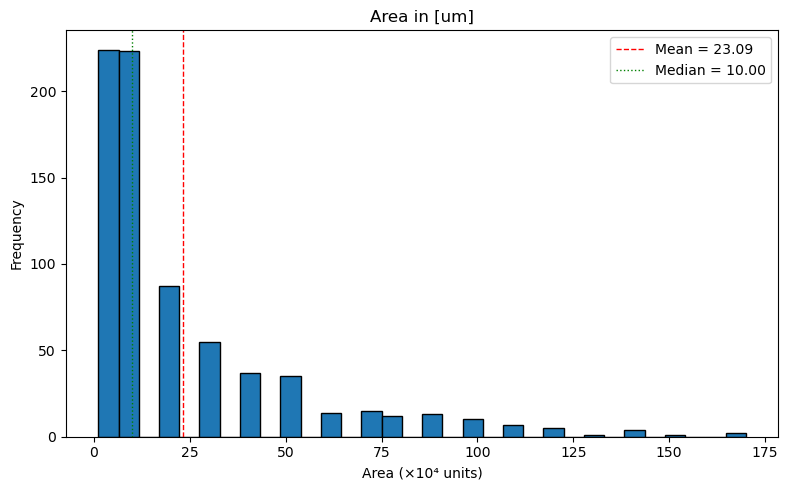


📊 Summary statistics for scaled Area (×10000):
count    745.00
mean      23.09
std       28.28
min        1.11
25%        5.56
50%       10.00
75%       30.00
max      170.00
Name: Area, dtype: float64


In [15]:
plot_scaled_area_summary(dfA)         # scale by 10,000

### Class B

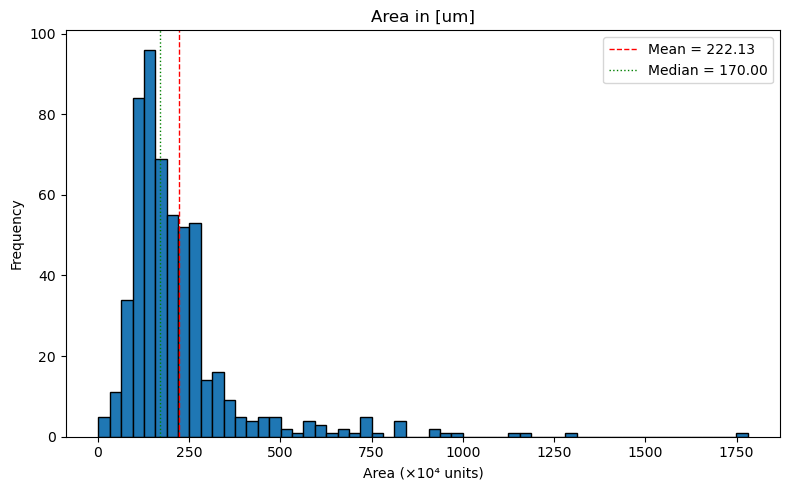


📊 Summary statistics for scaled Area (×10000):
count     549.00
mean      222.13
std       177.18
min         1.20
25%       130.00
50%       170.00
75%       260.00
max      1780.00
Name: Area, dtype: float64


In [16]:
plot_scaled_area_summary(dfB)         # scale by 10,000

### Class C

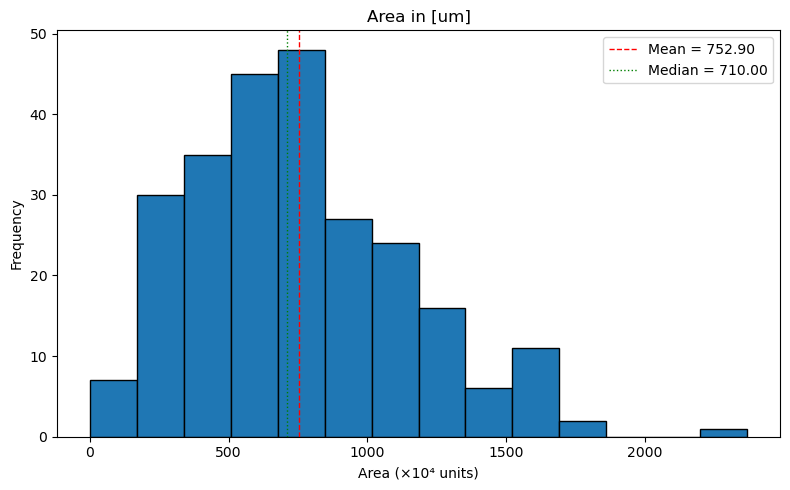


📊 Summary statistics for scaled Area (×10000):
count     252.00
mean      752.90
std       396.79
min         0.15
25%       460.00
50%       710.00
75%      1010.00
max      2370.00
Name: Area, dtype: float64


In [17]:
plot_scaled_area_summary(dfC)         # scale by 10,000

### Class D

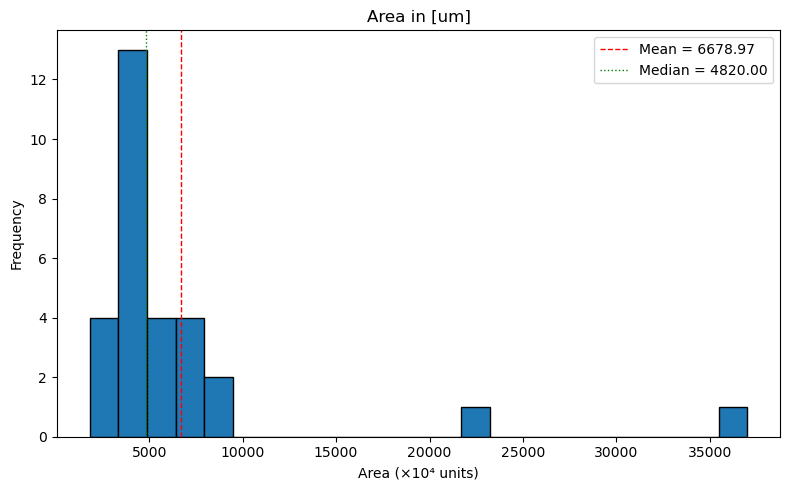


📊 Summary statistics for scaled Area (×10000):
count       29.00
mean      6678.97
std       6833.31
min       1820.00
25%       4040.00
50%       4820.00
75%       6480.00
max      37000.00
Name: Area, dtype: float64


In [18]:
plot_scaled_area_summary(dfD)         # scale by 10,000